In [2]:
# The causalTree package is not in CRAN, the most common R repository.
# To install it, uncomment the next lines as appropriate.
# install.packages("devtools")  # if you don't have this installed yet.
# devtools::install_github('susanathey/causalTree') 

library(causalTree)
# use e.g., install.packages("grf") to install any of the following packages.
library(grf)
library(rpart)
library(glmnet)
library(splines)
library(MASS)
library(lmtest)
library(sandwich)
library(ggplot2)
library(haven)

Loading required package: rpart

Loading required package: rpart.plot

Loading required package: data.table

Loading required package: Matrix

Loaded glmnet 4.1-4

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [3]:
data <- read_dta("C:/Users/sandr/Dropbox/MGTECON634_Project/data/matching_panel5_treat12.dta")

In [4]:
is.data.frame(data)

[1] TRUE

In [4]:
# stay treat12 tenured level sex age clasification cpelec cpwater

# Clean Data

In [5]:
# Dummy for sex, and categorical values for level and clasification 
data$sex[data$sex == 1] <- 1
data$sex[data$sex == 2] <- 0
data$level <- as.factor(data$level)
data$clasification <- as.factor(data$clasification)

In [6]:
outcome <- "stay"
treatment <- "treat12"
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")

# Replicate main Results

In [7]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==1 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 1 & strict_qualified == 
    1 & ano == 2016))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98581  0.05739  0.08545  0.11004  0.19524 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.7054709  0.0176330  40.009   <2e-16 ***
treat12                 0.0002453  0.0040631   0.060   0.9519    
tenured                        NA         NA      NA       NA    
sex                    -0.0094226  0.0040820  -2.308   0.0210 *  
age                     0.0037790  0.0002617  14.439   <2e-16 ***
factor(level)2          0.0083060  0.0099193   0.837   0.4024    
factor(level)3          0.0049741  0.0113954   0.436   0.6625    
factor(clasification)2 -0.0086832  0.0065443  -1.327   0.1846    
factor(clasification)3 -0.0004257  0.0073458  -0.058   0.9538    
cpelec                  0.0227707  0.0094413   2.412   0.0159 *  
cpwater   

In [8]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Qualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 0 & strict_qualified == 
    1 & ano == 2016))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4330 -0.2964 -0.2522  0.6522  0.8336 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.110352   0.020276   5.442 5.30e-08 ***
treat12                 0.047713   0.006041   7.898 2.94e-15 ***
tenured                       NA         NA      NA       NA    
sex                     0.007348   0.006219   1.181   0.2374    
age                     0.003071   0.000405   7.584 3.47e-14 ***
factor(level)2          0.004622   0.008742   0.529   0.5970    
factor(level)3          0.009403   0.011835   0.794   0.4269    
factor(clasification)2 -0.008398   0.009140  -0.919   0.3582    
factor(clasification)3  0.062801   0.010961   5.729 1.02e-08 ***
cpelec                 -0.020036   0.010036  -1.996   0.0459 *  
cpwater                 0.00993

In [9]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Unqualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 0 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
ols.res


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             0.1248870  0.0494152  2.5273 0.0115435 *  
treat12                 0.0408633  0.0209398  1.9515 0.0510916 .  
sex                    -0.0022900  0.0201888 -0.1134 0.9096973    
age                     0.0040742  0.0010582  3.8501 0.0001205 ***
factor(level)2         -0.0560187  0.0254597 -2.2003 0.0278596 *  
factor(level)3         -0.0599011  0.0321866 -1.8611 0.0628302 .  
factor(clasification)2  0.0320481  0.0249825  1.2828 0.1996507    
factor(clasification)3  0.0912484  0.0297241  3.0698 0.0021602 ** 
cpelec                 -0.0072515  0.0189478 -0.3827 0.7019619    
cpwater                -0.0298502  0.0211662 -1.4103 0.1585591    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# Via causal trees

In [10]:
# # Only valid for randomized data!
# fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))
# X <- model.matrix(fmla, data)

In [12]:
# fmla <- formula(stay ~  tenured + sex + age)
# fmla

In [13]:
# # Prepare dataset
# fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# X <- model.matrix(fmla, data)

In [14]:
#stay treat12 tenured level sex age clasification cpelec cpwater

## Data from temporary teachers in 2016

In [11]:
data_main_col <- data.frame(data$stay, data$treat12,data$tenured, 
                            data$level, data$sex, data$age, data$clasification, 
                            data$cpelec, data$cpwater, data$nlat_ie, data$nlong_ie,
                           data$x_dim, data$y_dim, data$ano)
 
names(data_main_col) <- c('stay', 'treat12', 'tenured', 'level', 'sex', 'age', 
                       'clasification', 'cpelec', 'cpwater', "nlat_ie", "nlong_ie", "x_dim", "y_dim", "ano")
data_clean = na.omit(data_main_col)

In [12]:
data_clean <- subset(data_clean, ano== 2016 & tenured == 0)

In [13]:
dim(data_clean)

[1] 29606    14

# Using Blocks

In [14]:
data[,"clasification"] <- as.integer(as.character(data[,"clasification"]))
data[,"level"] <- as.integer(as.character(data[,"level"]))
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "x_dim", "y_dim")

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"
Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"


In [26]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))

# fmla <- formula(stay ~  treat12 + tenured + sex + age + 
#                         factor(level) + factor(clasification) 
#                         + cpelec + cpwater + x_dim + y_dim)
ols <- lm(fmla, data=data_clean)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5311 -0.2939 -0.2460  0.6480  0.8594 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.275e-02  2.574e-02  -2.826  0.00472 ** 
tenured                NA         NA      NA       NA    
level2         -2.138e-03  8.049e-03  -0.266  0.79055    
level3          1.579e-02  1.064e-02   1.484  0.13781    
sex             4.689e-03  5.819e-03   0.806  0.42042    
age             3.209e-03  3.584e-04   8.955  < 2e-16 ***
clasification2 -5.211e-03  8.418e-03  -0.619  0.53592    
clasification3  4.976e-02  9.850e-03   5.052 4.39e-07 ***
cpelec         -3.274e-03  8.469e-03  -0.387  0.69907    
cpwater         2.396e-02  5.903e-03   4.059 4.94e-05 ***
x_dim           1.067e-04  1.292e-05   8.257  < 2e-16 ***
y_dim           1.262e-04  1.010e-05  12.500  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.0

In [27]:
# Dividing data into three subsets
indices <- split(seq(nrow(data_clean)), sort(seq(nrow(data_clean)) %% 3))
names(indices) <- c('split', 'est', 'test')

In [28]:
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)
fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + x_dim + y_dim

In [29]:
dim(data_clean)

[1] 29606    14

In [30]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=100,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)


[1] 2
[1] "CT"


In [31]:
# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

In [32]:
# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

In [33]:
# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

In [34]:
# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

In [35]:
num.leaves

[1] 11

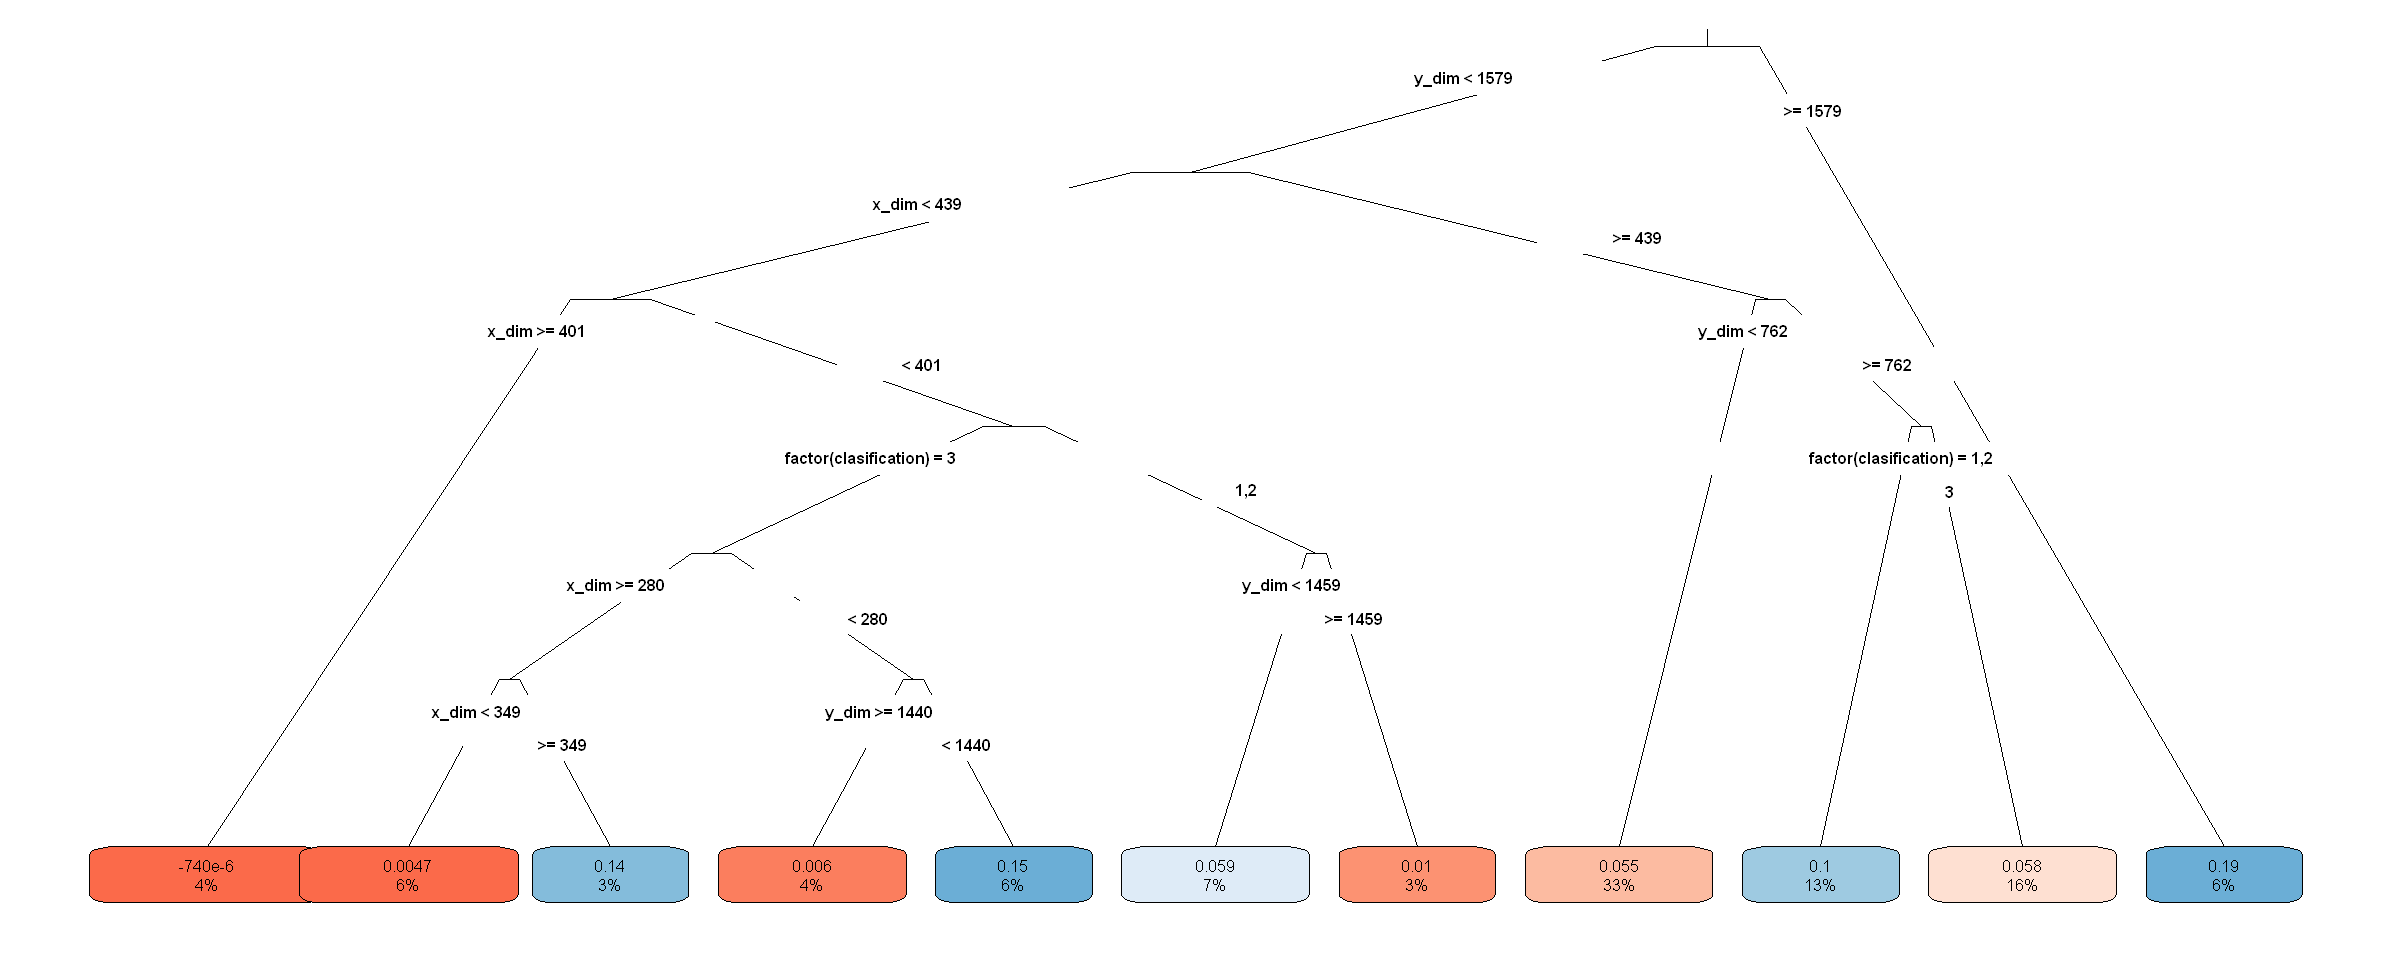

In [36]:
options(repr.plot.width=20, repr.plot.height=8)
rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu", # Palette for coloring the node
  cex = 0.8,
  xcompact=FALSE,
  ycompact=FALSE)

# Using Lat and Longitud

In [37]:
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + nlat_ie + nlong_ie)
fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))

fmla

[1] "stay  ~ tenured + level + sex + age + clasification + cpelec + cpwater + nlat_ie + nlong_ie"

[1] 2
[1] "CT"


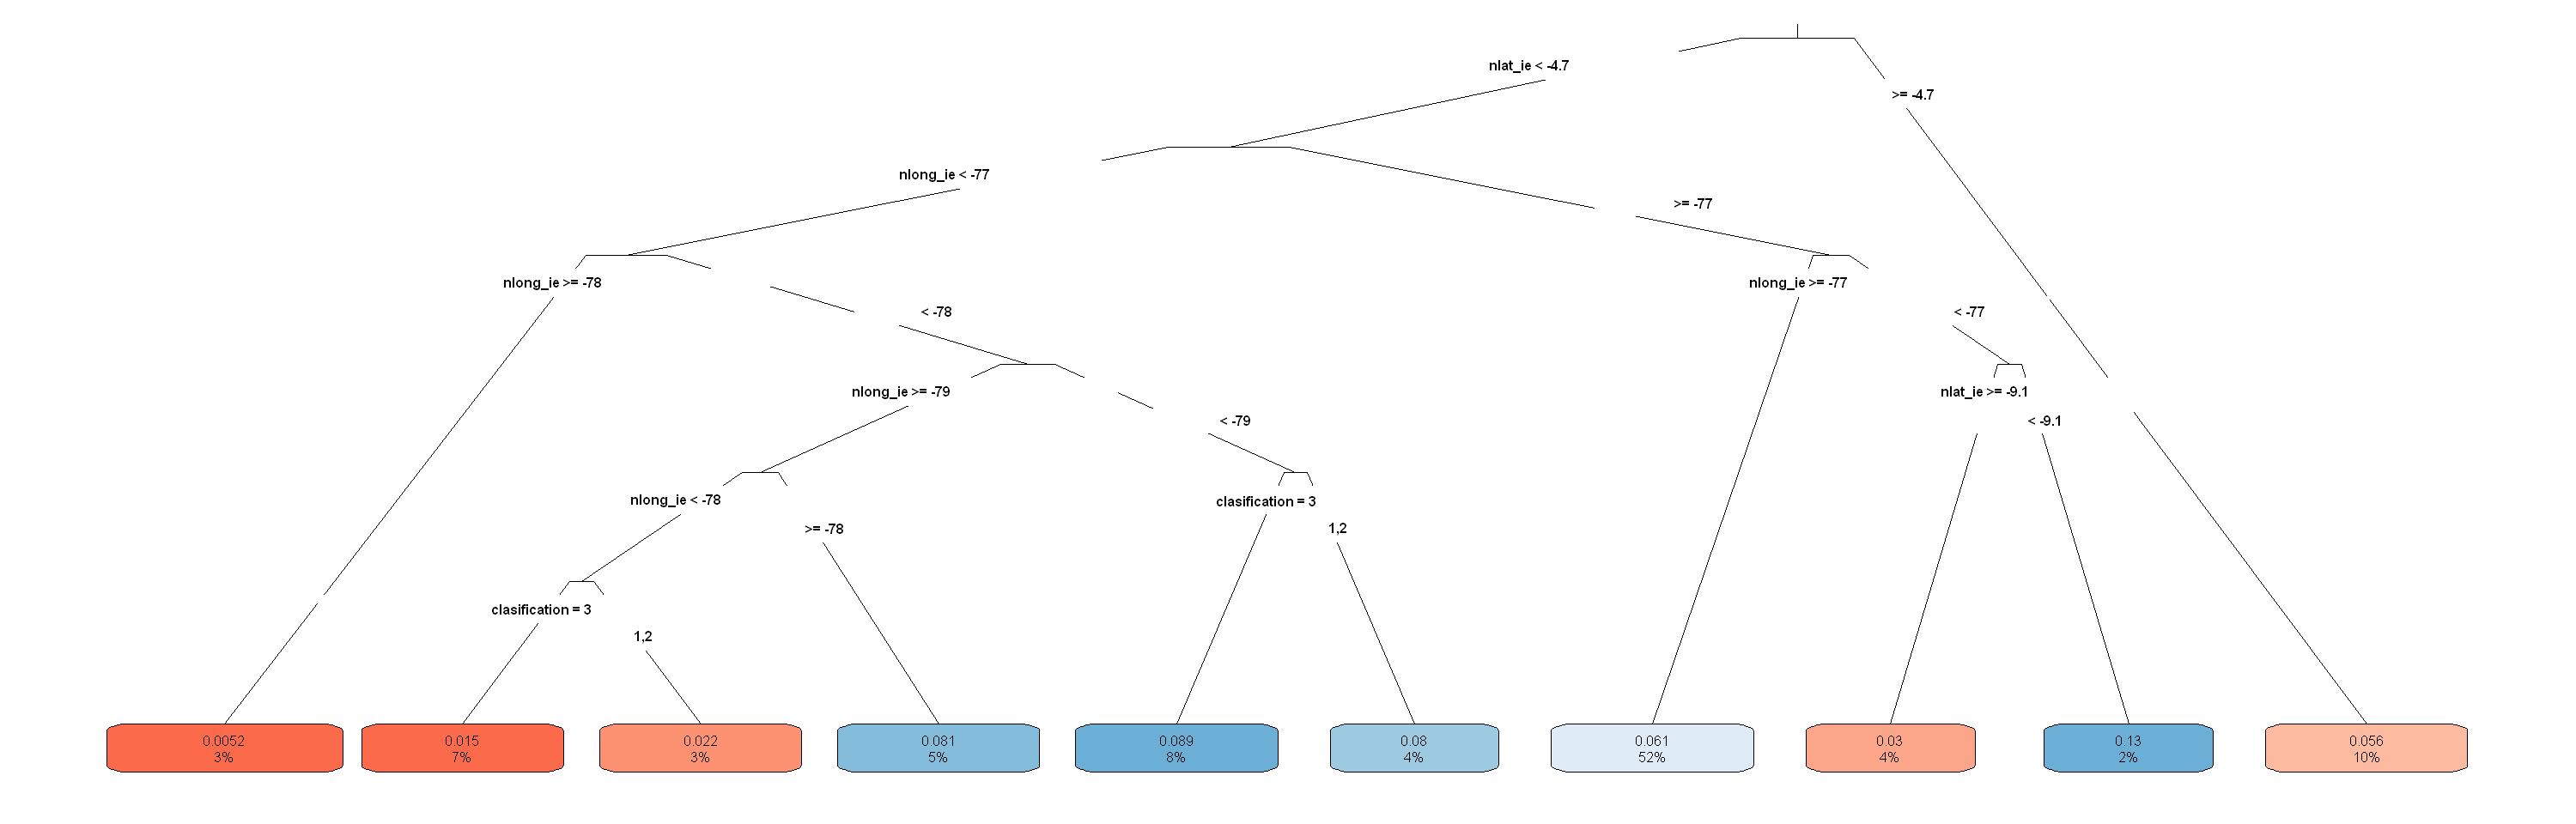

In [39]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=120,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)

# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

options(repr.plot.width=25, repr.plot.height=8)
plot <- rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu", # Palette for coloring the node
  cex = 0.8,
  xcompact=FALSE,
  ycompact=FALSE)

In [31]:
# # Dividing data into three subsets
# indices <- split(seq(nrow(data_clean_2016)), sort(seq(nrow(data_clean_2016)) %% 3))
# names(indices) <- c('split', 'est', 'test')

In [32]:
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater )

# # Fitting the forest
# ct.unpruned <- honest.causalTree(
#   formula=fmla,            # Define the model
#   data=data_clean_2016[indices$split,],
#   treatment=data_clean_2016[indices$split, treatment],
#   est_data=data_clean_2016[indices$est,],
#   est_treatment=data_clean_2016[indices$est, treatment],
#   minsize=1,                 # Min. number of treatment and control cases in each leaf
#   HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
#   # We recommend not changing the parameters below
#   split.Rule="CT",            # Define the splitting option
#   cv.option="TOT",            # Cross validation options
#   cp=0,                       # Complexity parameter
#   split.Honest=TRUE,          # Use honesty when splitting
#   cv.Honest=TRUE              # Use honesty when performing cross-validation
# )

# # Table of cross-validated values by tuning parameter.
# ct.cptable <- as.data.frame(ct.unpruned$cptable)

# # Obtain optimal complexity parameter to prune tree.
# cp.selected <- which.min(ct.cptable$xerror)
# cp.optimal <- ct.cptable[cp.selected, "CP"]

# # Prune the tree at optimal complexity parameter.
# ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# # Predict point estimates (on estimation sample)
# tau.hat.est <- predict(ct.pruned, newdata=data_clean_2016[indices$est,])

# # Create a factor column 'leaf' indicating leaf assignment in the estimation set
# num.leaves <- length(unique(tau.hat.est))
# leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

# rpart.plot(
#   x=ct.pruned,        # Pruned tree
#   type=3,             # Draw separate split labels for the left and right directions
#   fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
#   leaf.round=1,       # Rounding of the corners of the leaf node boxes
#   extra=100,          # Display the percentage of observations in the node
#   branch=.1,          # Shape of the branch lines
#   box.palette="RdBu") # Palette for coloring the node

In [33]:
# Assuming discontinuity generates RCT

In [43]:
# Auxiliary function to computes adjusted p-values 
# following the Romano-Wolf method.
# For a reference, see http://ftp.iza.org/dp12845.pdf page 8
#  t.orig: vector of t-statistics from original model
#  t.boot: matrix of t-statistics from bootstrapped models
romano_wolf_correction <- function(t.orig, t.boot) {
  abs.t.orig <- abs(t.orig)
  abs.t.boot <- abs(t.boot)
  abs.t.sorted <- sort(abs.t.orig, decreasing = TRUE)

  max.order <- order(abs.t.orig, decreasing = TRUE)
  rev.order <- order(max.order)

  M <- nrow(t.boot)
  S <- ncol(t.boot)

  p.adj <- rep(0, S)
  p.adj[1] <- mean(apply(abs.t.boot, 1, max) > abs.t.sorted[1])
  for (s in seq(2, S)) {
    cur.index <- max.order[s:S]
    p.init <- mean(apply(abs.t.boot[, cur.index, drop=FALSE], 1, max) > abs.t.sorted[s])
    p.adj[s] <- max(p.init, p.adj[s-1])
  }
  p.adj[rev.order]
}

# Computes adjusted p-values for linear regression (lm) models.
#    model: object of lm class (i.e., a linear reg model)
#    indices: vector of integers for the coefficients that will be tested
#    cov.type: type of standard error (to be passed to sandwich::vcovHC)
#    num.boot: number of null bootstrap samples. Increase to stabilize across runs.
# Note: results are probabilitistic and may change slightly at every run. 
#
# Adapted from the p_adjust from from the hdm package, written by Philipp Bach.
# https://github.com/PhilippBach/hdm_prev/blob/master/R/p_adjust.R
summary_rw_lm <- function(model, indices=NULL, cov.type="HC2", num.boot=10000) {

  if (is.null(indices)) {
    indices <- 1:nrow(coef(summary(model)))
  }
  # Grab the original t values.
  summary <- coef(summary(model))[indices,,drop=FALSE]
  t.orig <- summary[, "t value"]

  # Null resampling.
  # This is a trick to speed up bootstrapping linear models.
  # Here, we don't really need to re-fit linear regressions, which would be a bit slow.
  # We know that betahat ~ N(beta, Sigma), and we have an estimate Sigmahat.
  # So we can approximate "null t-values" by
  #  - Draw beta.boot ~ N(0, Sigma-hat) --- note the 0 here, this is what makes it a *null* t-value.
  #  - Compute t.boot = beta.boot / sqrt(diag(Sigma.hat))
  Sigma.hat <- vcovHC(model, type=cov.type)[indices, indices]
  se.orig <- sqrt(diag(Sigma.hat))
  num.coef <- length(se.orig)
  beta.boot <- mvrnorm(n=num.boot, mu=rep(0, num.coef), Sigma=Sigma.hat)
  t.boot <- sweep(beta.boot, 2, se.orig, "/")
  p.adj <- romano_wolf_correction(t.orig, t.boot)

  result <- cbind(summary[,c(1,2,4),drop=F], p.adj)
  colnames(result) <- c('Estimate', 'Std. Error', 'Orig. p-value', 'Adj. p-value')
  result
}

In [44]:
# This is only valid in randomized datasets.
fmla <- paste0(outcome, ' ~ ', paste0(treatment, '* leaf'))
if (num.leaves == 1) {
  print("Skipping since there's a single leaf.")

} else if (num.leaves == 2) {
  # if there are only two leaves, no need to correct for multiple hypotheses
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  coeftest(ols, vcov=vcovHC(ols, 'HC2'))[4,,drop=F]

} else {
  # if there are three or more leaves, use Romano-Wolf test correction 
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  interact <- which(sapply(names(coef(ols)), function(x) grepl(paste0(treatment, ":"), x)))
  summary_rw_lm(ols, indices=interact, cov.type = 'HC2')
}

,Estimate,Std. Error,Orig. p-value,Adj. p-value
treat12:leaf2,-0.037310399,0.07038027,0.5960409,0.9778
treat12:leaf3,0.022560656,0.08151141,0.7819576,0.9839
treat12:leaf4,0.099243629,0.07876723,0.2077241,0.6441
treat12:leaf5,-0.029849596,0.06692916,0.6556193,0.9839
treat12:leaf6,-0.040622018,0.06072958,0.5035806,0.9452
treat12:leaf7,-0.092716693,0.07650302,0.2255768,0.6453
treat12:leaf8,0.026422591,0.07638460,0.7294165,0.9839
treat12:leaf9,0.026939916,0.06914270,0.6968233,0.9839
treat12:leaf10,-0.005272767,0.09226791,0.9544303,0.9839


In [36]:
# data 

# Average Covariate values wihtin each leaf

In [45]:
covariates = c("sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

In [46]:
data <- data_clean

In [39]:
# covariate = "clasification"

# fmla <- formula(paste0(covariate, "~ 0 + leaf"))
# ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
# ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))

# # Retrieve results
# avg <- ols.res[,1]
# stderr <- ols.res[,2]

# # Tally up results
# data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
#          # Used for coloring
#          scaling=pnorm((avg - mean(avg))/sd(avg)), 
#          # We will order based on how much variation is 'explain' by the averages
#          # relative to the total variation of the covariate in the data
#          variation=sd(avg) / sd(data[,covariate]),
#          # String to print in each cell in heatmap below
#          labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))

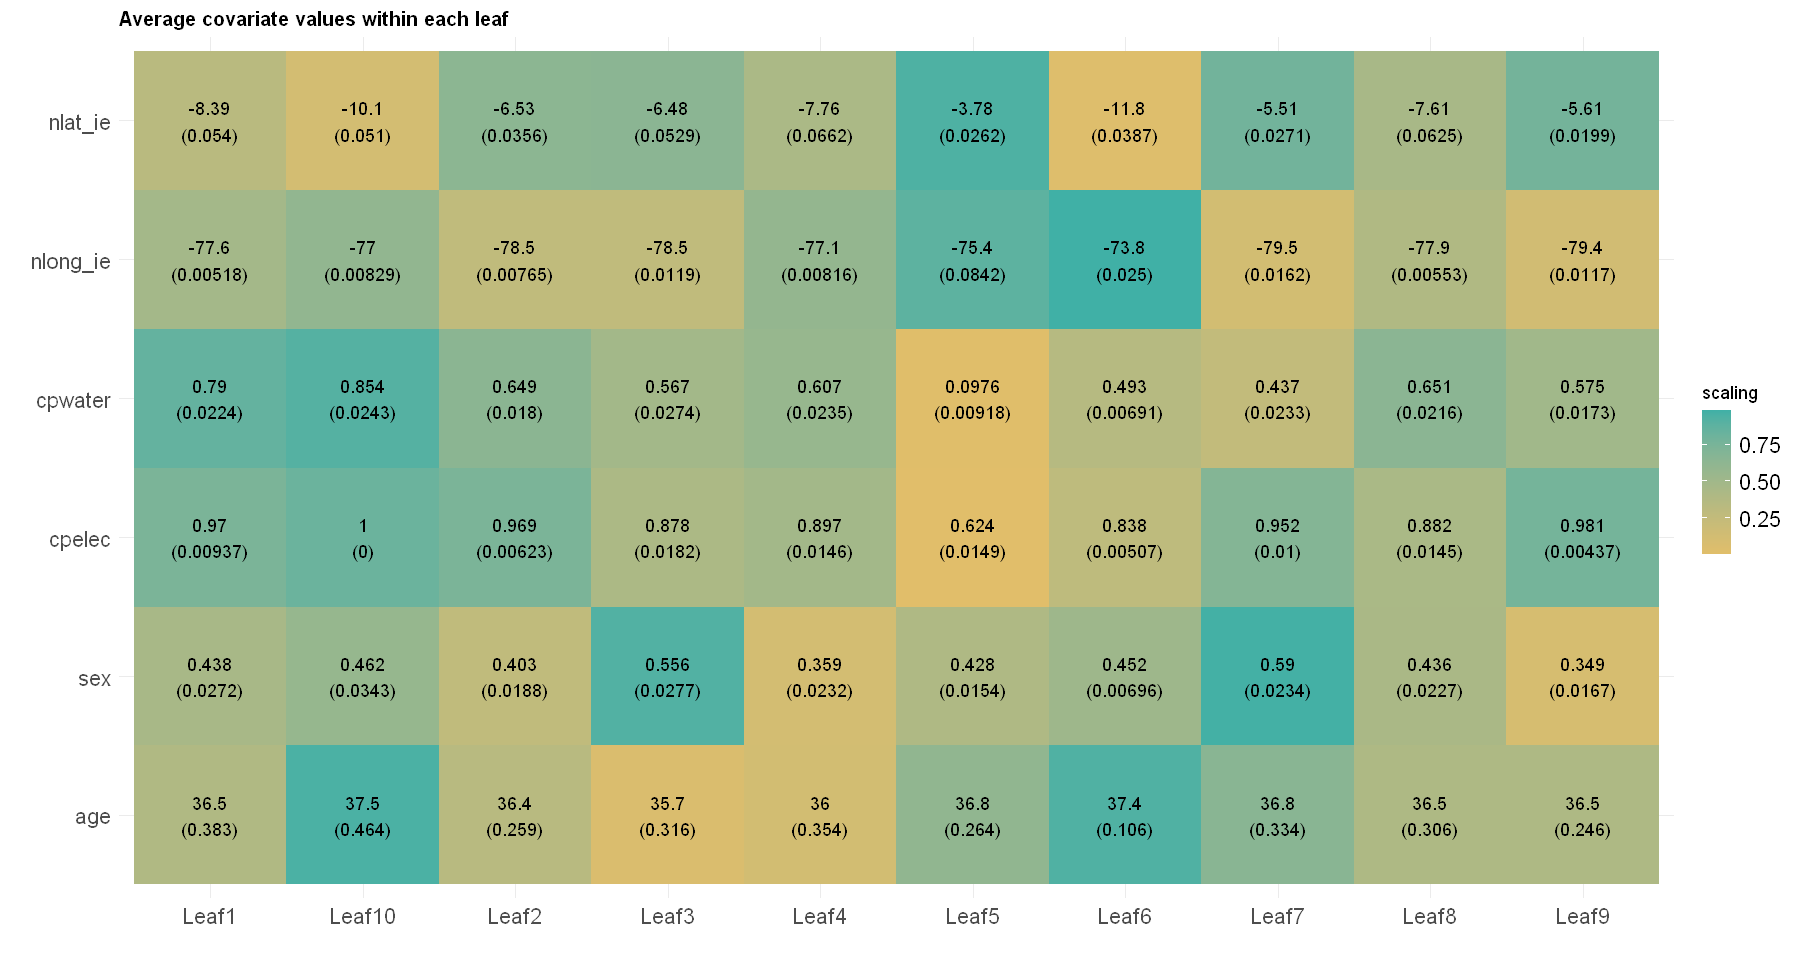

In [47]:
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per leaf (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + leaf"))
      ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)

df <- do.call(rbind, df)

# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))


# plot heatmap
options(repr.plot.width=15, repr.plot.height=8)
ggplot(df) + 
    aes(leaf, covariate, fig(50,50)) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within each leaf")) +
    theme_minimal() + 
    ylab("") + xlab("") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

# Via grf

## 1. Using LATITUDE and LONGITUDE

In [49]:
covariates = c("sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)

covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")

# fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))

fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + nlat_ie + nlong_ie

In [51]:
# Preparing data to fit a causal forest
# fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

In [52]:
forest.tau <- causal_forest(XX, Y, W)

In [53]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

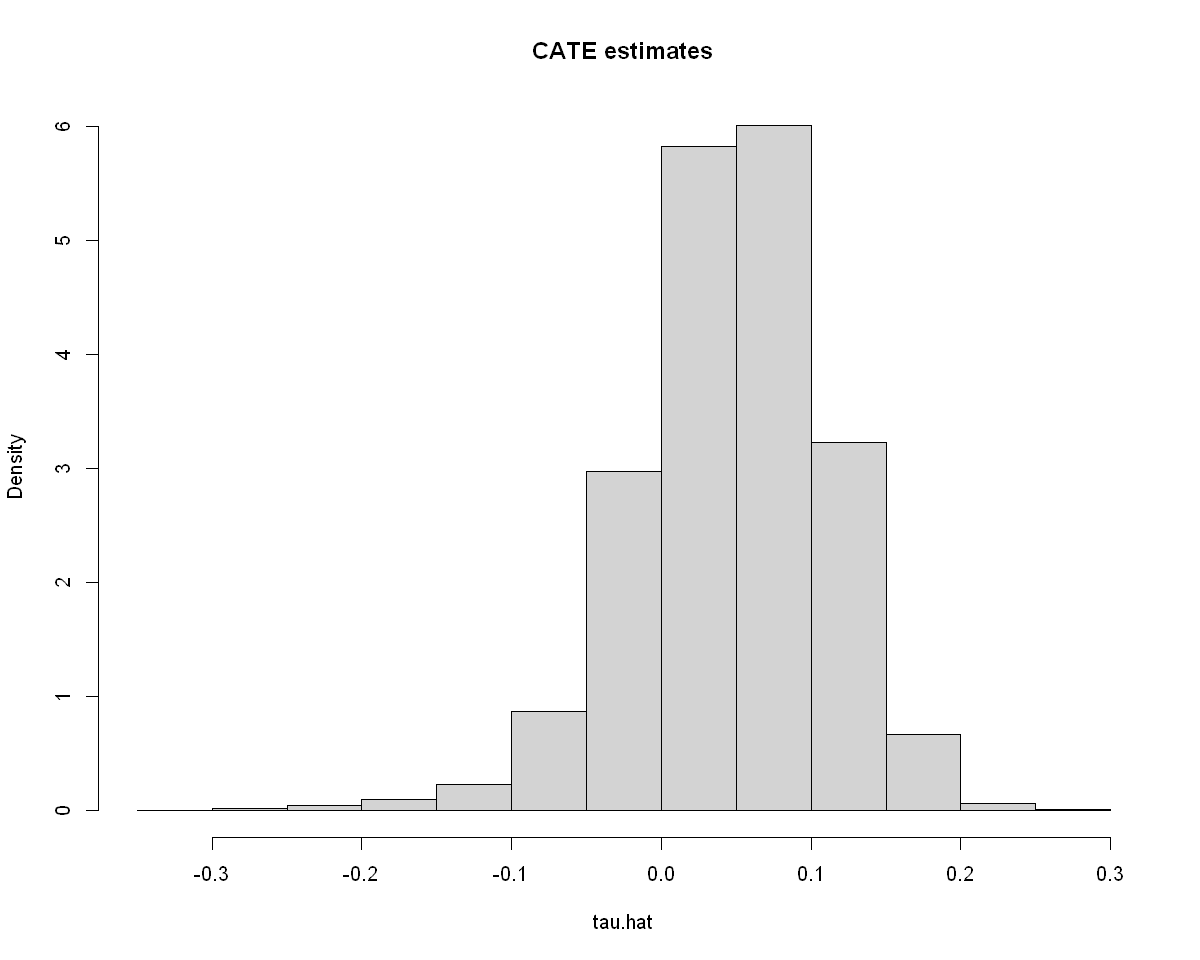

In [54]:
options(repr.plot.width=10, repr.plot.height=8)
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

### Data-driven subgroups

In [160]:
# Valid randomized data and observational data with unconfoundedness+overlap.
# Note: read the comments below carefully. 
# In randomized settings, do not estimate forest.e and e.hat; use known assignment probs.

# Prepare dataset
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
n <- nrow(data)

# Number of rankings that the predictions will be ranking on 
# (e.g., 2 for above/below median estimated CATE, 5 for estimated CATE quintiles, etc.)
num.rankings <- 5  

# Prepare for data.splitting
# Assign a fold number to each observation.
# The argument 'clusters' in the next step will mimick K-fold cross-fitting.
num.folds <- 30
folds <- sort(seq(n) %% num.folds) + 1

# Comment or uncomment depending on your setting.
# Observational setting with unconfoundedness+overlap (unknown assignment probs):
# forest <- causal_forest(X, Y, W, clusters = folds)
# Randomized settings with fixed and known probabilities (here: 0.5).
forest <- causal_forest(X, Y, W, clusters = folds)

# Retrieve out-of-bag predictions.
# Predictions for observation in fold k will be computed using 
# trees that were not trained using observations for that fold.
tau.hat <- predict(forest)$predictions


# Rank observations *within each fold* into quintiles according to their CATE predictions.
ranking <- rep(NA, n)
for (fold in seq(num.folds)) {
  tau.hat.quantiles <- quantile(tau.hat[folds == fold], probs = seq(0, 1, by=1/num.rankings))
  ranking[folds == fold] <- cut(tau.hat[folds == fold], tau.hat.quantiles, include.lowest=TRUE,labels=seq(num.rankings))
}

In [166]:
ranking

[1] 5 5 4 5 4 5 4 5 4 5 5 5 5 5 5 5 5 4 3 5 4 5 4 5 2 3 3 3 1 1 5 5 5 5 4 5
   [37] 3 4 1 1 2 4 3 1 3 1 5 4 4 2 1 4 5 4 1 4 4 2 4 4 1 2 2 1 3 1 2 4 1 2 1 2
   [73] 5 4 2 4 3 4 4 2 2 5 3 3 4 5 4 2 2 3 3 5 3 2 4 3 5 5 4 3 3 4 4 3 4 2 5 5
  [109] 4 4 3 5 5 4 4 4 4 3 4 2 1 2 3 3 5 4 3 2 4 5 4 4 4 4 4 3 4 4 3 5 5 5 5 4
  [145] 4 2 4 5 5 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 5 4 5 5 5 5 3 2 4 4 4 5 5 4 3 3
  [181] 4 2 2 2 2 1 4 4 4 5 3 3 2 2 2 3 3 3 3 3 2 2 2 2 3 2 4 3 2 2 1 1 1 1 5 3
  [217] 5 3 5 5 5 5 5 5 5 4 5 4 4 5 4 4 4 3 5 2 4 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5
  [253] 5 5 5 5 5 5 4 5 4 5 5 5 5 5 5 5 5 1 2 1 2 3 3 3 4 3 2 2 1 2 3 4 3 2 2 2
  [289] 2 2 2 5 2 5 5 5 5 5 5 5 3 5 3 1 1 2 2 3 3 2 2 2 3 4 5 3 5 2 2 1 2 1 3 1
  [325] 1 1 1 1 1 2 1 2 2 2 1 2 1 1 1 1 4 2 1 1 1 1 2 1 2 1 1 2 2 3 2 1 1 4 5 2
  [361] 5 1 2 1 5 1 1 1 3 5 5 5 3 2 4 3 3 4 4 4 1 3 4 2 3 3 3 1 4 3 3 4 4 4 4 3
  [397] 3 4 2 5 4 2 4 5 5 3 5 5 4 3 3 4 5 4 2 3 3 1 1 3 3 4 2 1 4 4 4 3 2 5 3 3
  [433] 4 3 3 5 2 2 3 2 2 3 3 1 3 4 1 3 4 2 3 4 4 2 3 5 2 2 3 1 1 2 3 3 3 1 4 4
  [469] 4 4 3 3 5 5 5 5 4 5 5 2 1 1 3 2 4 4 4 4 3 2 3 2 2 4 4 3 1 1 2 4 1 4 1 1
  [505] 2 5 2 1 4 4 3 4 4 3 3 1 1 1 1 1 1 4 4 3 5 5 4 4 4 4 4 5 1 1 1 1 2 2 2 2
  [541] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 4 4 4 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2
  [577] 2 2 2 1 1 1 1 1 1 2 1 1 2 3 2 2 1 1 1 3 5 5 5 5 5 5 5 4 3 5 4 2 3 1 3 3
  [613] 3 3 5 3 2 3 2 5 5 3 2 2 4 4 4 5 5 3 4 4 3 3 3 1 3 1 2 1 2 2 1 1 4 4 2 5
  [649] 1 1 1 1 2 4 2 3 3 2 4 5 2 3 4 2 3 5 5 3 3 2 3 2 1 2 5 3 5 5 4 2 3 3 1 1
  [685] 2 2 1 4 4 3 3 1 4 3 2 2 1 2 2 3 2 2 1 2 2 1 4 4 4 5 2 5 3 3 2 3 1 1 3 2
  [721] 2 4 2 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 1 4 1 5 4 5
  [757] 5 3 2 5 5 5 4 4 3 3 4 5 4 4 2 1 2 3 4 3 3 3 5 5 4 4 2 3 3 3 3 3 2 5 1 1
  [793] 1 4 3 1 4 2 3 1 4 1 4 2 2 5 5 5 4 4 4 3 4 4 4 3 4 2 5 5 5 4 4 5 5 5 2 5
  [829] 3 2 3 3 2 1 2 2 2 2 3 4 3 2 4 2 3 2 3 2 4 5 1 1 2 2 2 1 1 4 1 1 1 4 1 3
  [865] 2 3 3 4 1 1 3 1 3 3 3 2 4 3 3 3 5 2 1 5 2 4 3 4 5 4 4 5 3 4 4 3 2 4 1 1
  [901] 4 5 3 3 4 4 2 2 2 2 3 3 4 2 3 2 5 5 2 3 2 3 2 2 2 2 1 2 1 3 2 2 3 3 2 4
  [937] 5 4 5 5 5 2 5 2 2 4 5 5 5 5 5 4 5 4 5 3 4 3 3 3 4 5 5 5 3 3 3 3 3 3 3 3
  [973] 3 4 3 4 5 5 5 5 4 2 5 5 3 3 5 5 4 4 4 5 4 4 4 3 3 4 5 4 5 4 5 3 5 5 4 2
 [1009] 5 4 3 3 5 3 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 2 4 4
 [1045] 4 5 1 4 3 4 5 5 5 5 4 3 1 1 2 2 4 3 4 1 1 1 3 3 3 3 4 3 3 2 1 2 2 2 2 2
 [1081] 3 2 3 3 4 4 4 5 4 4 5 3 2 1 3 3 3 2 3 4 3 3 2 3 2 4 2 1 2 2 2 1 2 3 2 3
 [1117] 2 1 2 1 2 2 2 5 3 2 4 5 5 3 3 2 1 4 2 3 2 2 2 4 4 3 3 3 3 2 1 3 4 1 2 1
 [1153] 2 1 2 2 4 3 1 1 2 1 1 1 1 1 1 1 1 1 1 3 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1
 [1189] 1 1 1 1 2 2 1 1 1 1 1 2 3 5 5 5 5 5 2 3 4 3 4 5 3 1 1 2 1 1 1 2 3 2 1 2
 [1225] 1 4 1 1 1 1 1 1 3 2 2 3 1 2 2 1 2 2 1 1 1 1 1 3 1 1 1 3 2 2 3 1 1 1 1 2
 [1261] 3 1 3 2 2 2 4 3 2 2 1 1 1 1 1 2 2 4 4 5 4 2 1 1 1 5 2 1 1 3 3 4 4 1 2 2
 [1297] 4 2 1 3 4 3 2 3 3 3 2 1 2 2 4 4 2 1 2 1 2 2 1 3 4 3 2 4 2 2 3 1 2 3 3 5
 [1333] 3 2 3 3 3 2 3 2 3 2 4 1 1 1 1 1 1 1 1 1 1 2 3 1 3 1 1 1 1 1 1 2 1 1 1 3
 [1369] 1 1 1 1 2 1 2 2 5 5 4 1 2 1 1 1 2 2 5 3 4 5 5 5 4 4 5 4 3 5 5 4 5 3 3 4
 [1405] 3 4 4 5 4 4 5 5 3 4 4 2 4 3 5 2 2 3 4 3 2 2 2 3 3 5 4 4 2 2 4 1 2 1 1 4
 [1441] 1 1 4 4 3 4 5 5 3 2 1 1 1 5 4 2 1 2 3 1 1 4 3 4 3 3 2 2 1 1 5 5 2 2 2 3
 [1477] 2 4 4 5 5 3 5 2 4 1 5 5 1 4 5 1 1 2 4 5 5 5 4 5 5 4 5 5 5 5 5 5 5 5 5 5
 [1513] 4 5 5 5 5 3 5 5 5 1 4 4 2 4 1 2 3 2 1 3 4 3 1 1 1 4 4 2 4 2 2 1 4 3 5 4
 [1549] 3 3 2 2 4 4 3 4 3 2 3 3 4 2 3 2 3 4 3 3 3 3 4 5 5 4 2 1 1 4 4 2 3 1 2 1
 [1585] 2 3 4 4 5 4 3 1 2 2 4 5 5 2 3 4 4 4 4 1 3 4 2 5 3 3 4 3 5 4 5 5 5 4 4 3
 [1621] 4 3 3 3 2 2 2 3 2 1 2 3 2 1 1 3 1 4 5 5 5 5 5 1 3 4 4 4 4 3 5 4 5 4 4 3
 [1657] 3 3 5 5 5 5 4 4 5 4 5 4 3 3 5 4 4 4 4 5 2 5 5 5 5 5 4 5 2 5 2 3 4 4 4 5
 [1693] 5 3 2 4 3 5 4 4 5 5 4 4 4 4 4 4 5 4 5 4 5 5 5 4 3 4 5 5 5 5 4 5 5 3 2 1
 [1729] 2 3 4 2 3 2 3 3 3 3 3 2 1 2 5 3 2 2 3 4 3 3 4 3 2 4 3 2 4 2 2 2 2 3 2 3
 [1765] 5 5 3 5 5 1 5 3 4 4 5 4 5 4 3 5 2 1 1 4 4 2 4 4 1 3 4 5 4 4 4 2 4 4 5 3
 [18

In [169]:
treatment

[1] "treat12"

In [168]:
fmla

[1] "stay ~ 0 + ranking + ranking:treat12"

In [170]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
fmla <- paste0(outcome, " ~ 0 + ranking + ranking:", treatment)
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate <- coeftest(ols.ate, vcov=vcovHC(ols.ate, type='HC2'))
interact <- which(grepl(":", rownames(ols.ate)))
ols.ate <- data.frame("ols", paste0("Q", seq(num.rankings)), ols.ate[interact, 1:2])
rownames(ols.ate) <- NULL # just for display
colnames(ols.ate) <- c("method", "ranking", "estimate", "std.err")
ols.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
ols,Q1,-0.00232906,0.01186673
ols,Q2,0.03283452,0.01189138
ols,Q3,0.05265774,0.01194004
ols,Q4,0.07092440,0.01204156
ols,Q5,0.05921062,0.01219439


In [172]:
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate


Call:
lm(formula = fmla, data = transform(data, ranking = factor(ranking)))

Coefficients:
        ranking1          ranking2          ranking3          ranking4  
        0.276496          0.256926          0.241429          0.233401  
        ranking5  ranking1:treat12  ranking2:treat12  ranking3:treat12  
        0.248346         -0.002329          0.032835          0.052658  
ranking4:treat12  ranking5:treat12  
        0.070924          0.059211  


In [177]:
data=transform(data, ranking=factor(ranking))
data

,stay,treat12,tenured,level,sex,age,clasification,cpelec,cpwater,nlat_ie,nlong_ie,x_dim,y_dim,ano,ranking
,<dbl>,<dbl>,<dbl>,<int>,<dbl+lbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
112,0,0,0,2,0,50,2,1,1,-13.92740,-72.48020,983.0224,487.2986,2016,5
170,0,1,0,2,1,34,2,1,1,-13.90584,-72.52444,978.0976,489.6825,2016,5
191,0,1,0,2,1,33,2,1,1,-13.78590,-72.49600,981.2635,502.9442,2016,4
197,0,1,0,2,1,41,2,1,1,-13.78590,-72.49600,981.2635,502.9442,2016,5
198,0,1,0,2,1,31,2,1,1,-13.78590,-72.49600,981.2635,502.9442,2016,4
201,0,0,0,2,0,39,3,1,1,-14.05990,-72.56770,973.2819,472.6481,2016,5
211,1,0,0,2,1,31,3,1,1,-14.07739,-72.47088,984.0599,470.7142,2016,4
223,0,0,0,2,0,41,3,1,1,-14.07739,-72.47088,984.0599,470.7142,2016,5
224,0,0,0,2,0,57,3,1,1,-14.07739,-72.47088,984.0599,470.7142,2016,4


In [162]:
# Computing AIPW scores.
tau.hat <- predict(forest)$predictions
e.hat <- forest$W.hat # P[W=1|X]
m.hat <- forest$Y.hat # E[Y|X]

# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu.hat.0 <- m.hat - e.hat * tau.hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu.hat.1 <- m.hat + (1 - e.hat) * tau.hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
aipw.scores <- tau.hat + W / e.hat * (Y -  mu.hat.1) - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0)
ols <- lm(aipw.scores ~ 0 + factor(ranking))
forest.ate <- data.frame("aipw", paste0("Q", seq(num.rankings)), coeftest(ols, vcov=vcovHC(ols, "HC2"))[,1:2])
colnames(forest.ate) <- c("method", "ranking", "estimate", "std.err")
rownames(forest.ate) <- NULL # just for display
forest.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
aipw,Q1,-0.01095271,0.01250059
aipw,Q2,0.01379957,0.01387304
aipw,Q3,0.04867966,0.01266064
aipw,Q4,0.06192973,0.01285324
aipw,Q5,0.05715516,0.01224728


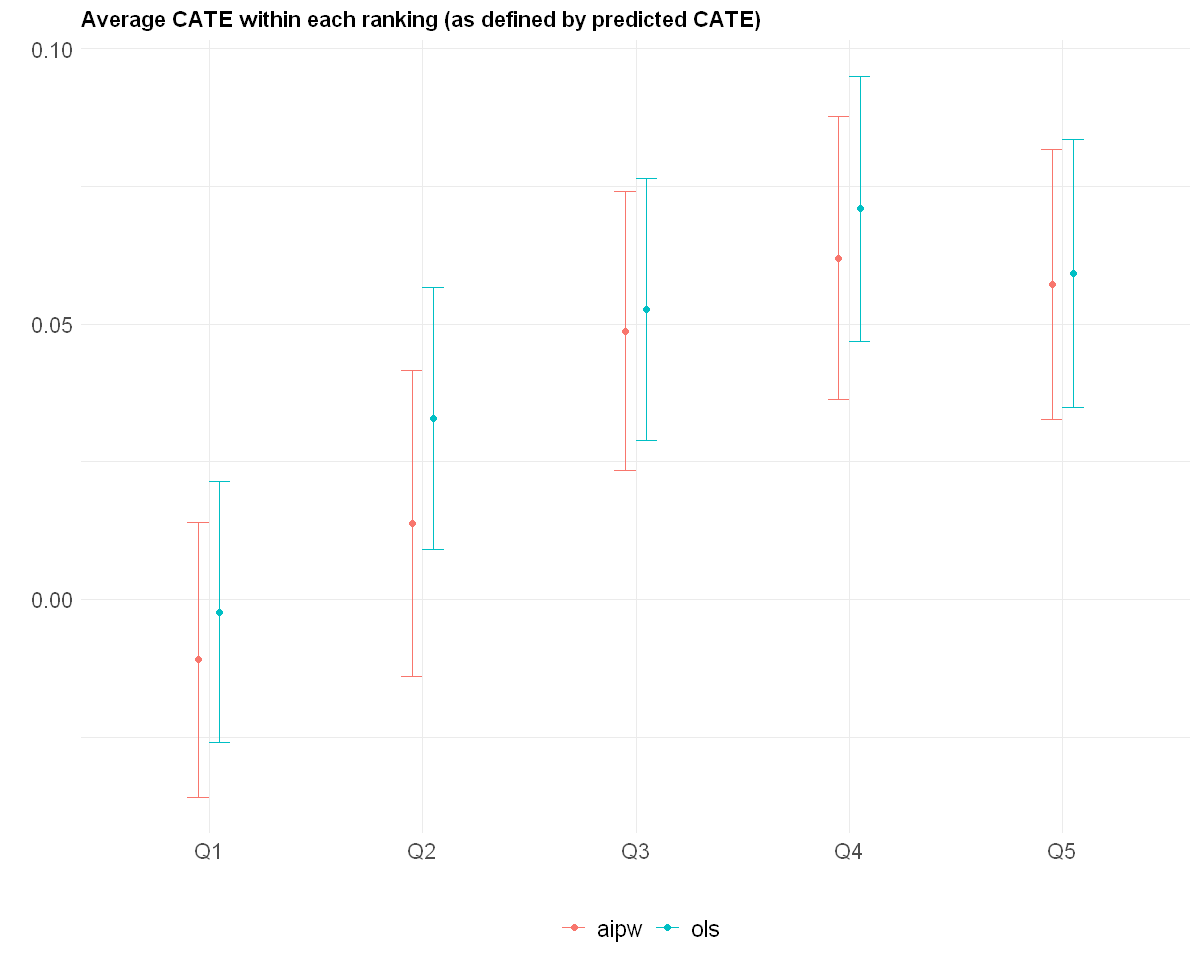

In [163]:
# Concatenate the two results.
res <- rbind(forest.ate, ols.ate)

# Plotting the point estimate of average treatment effect 
# and 95% confidence intervals around it.
options(repr.plot.width=10, repr.plot.height=8)
ggplot(res) +
  aes(x = ranking, y = estimate, group=method, color=method, fig(50,50)) + 
  geom_point(position=position_dodge(0.2)) +
  geom_errorbar(aes(ymin=estimate-2*std.err, ymax=estimate+2*std.err), width=.2, position=position_dodge(0.2)) +
  ylab("") + xlab("") +
  ggtitle("Average CATE within each ranking (as defined by predicted CATE)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
        axis.text=element_text(size=13), 
        legend.position="bottom", legend.title = element_blank(), legend.text = element_text(size=14))

### Test predictions using difference-in-means estimator

In [159]:
# Valid in randomized settings only.

# y ~ ranking + w + ranking:w
fmla <- paste0(outcome, "~ ranking + ", treatment, " + ranking:", treatment) 
ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
interact <- which(sapply(names(coef(ols)), function(x) grepl(":", x)))
res <- summary_rw_lm(ols, indices=interact)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.01653264,0.01697801,3.301795e-01,0.3358
Rank 3 - Rank 1,0.03940307,0.01706529,2.095266e-02,0.0392
Rank 4 - Rank 1,0.07879466,0.01720722,4.687391e-06,0.0000
Rank 5 - Rank 1,0.05969595,0.01704040,4.603800e-04,0.0011


In [60]:
# Valid in randomized and observational settings with unconfoundedness+overlap.

# Using AIPW scores computed above
ols <- lm(aipw.scores ~ 1 + factor(ranking))
res <- summary_rw_lm(ols, indices=2:num.rankings)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.03386235,0.01624141,0.0370834465,0.0344
Rank 3 - Rank 1,0.04488582,0.01624004,0.0057150696,0.0142
Rank 4 - Rank 1,0.05941540,0.01624073,0.0002542156,0.0008
Rank 5 - Rank 1,0.04269081,0.01624141,0.0085802725,0.0153


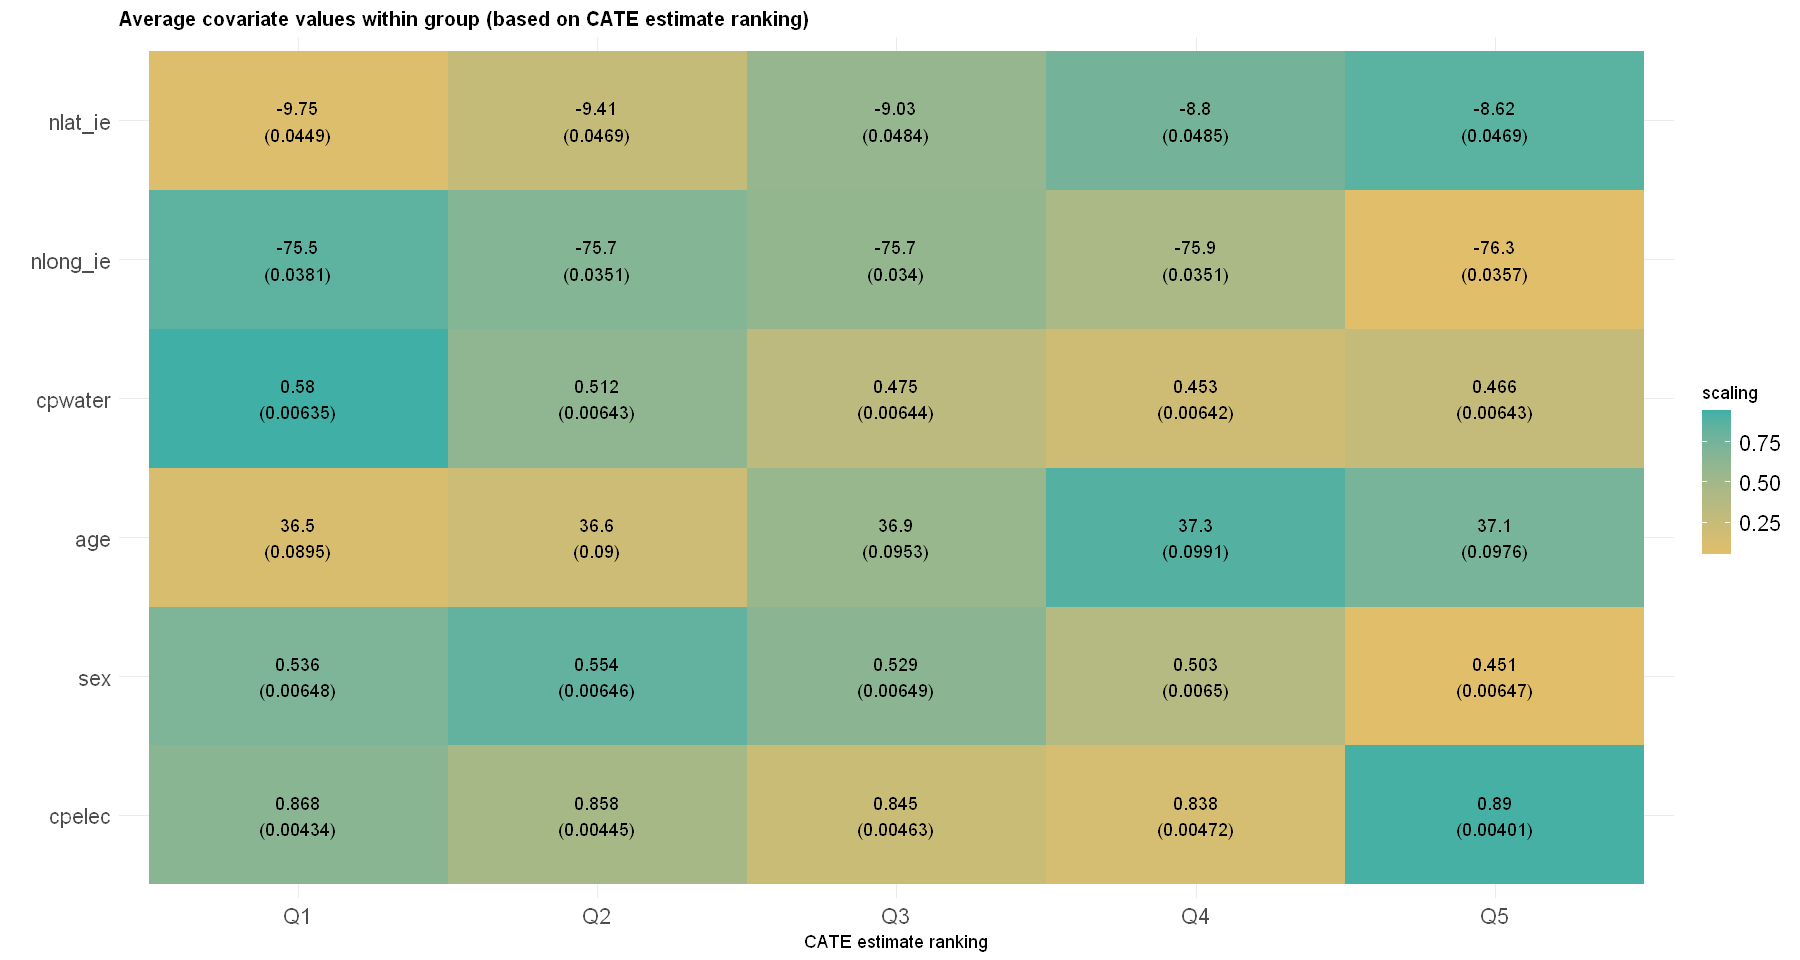

In [61]:
covariates = c("sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per ranking (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + ranking"))
      ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, ranking=paste0("Q", seq(num.rankings)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)
df <- do.call(rbind, df)


# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

options(repr.plot.width=15, repr.plot.height=8)
# plot heatmap
ggplot(df) +
    aes(ranking, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within group (based on CATE estimate ranking)")) +
    theme_minimal() + 
    ylab("") + xlab("CATE estimate ranking") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 
options(repr.plot.width=15, repr.plot.height=8)

### Best linear projection

In [62]:
# Best linear projection of the conditional average treatment effect on covariates
best_linear_projection(forest.tau, X)

Warning message in best_linear_projection(forest.tau, X):
"Estimated treatment propensities take values between 0.08 and 1 and in particular get very close to 0 or 1."



Best linear projection of the conditional average treatment effect.
Confidence intervals are cluster- and heteroskedasticity-robust (HC3):

                          Estimate  Std. Error t value Pr(>|t|)   
(Intercept)             0.05770948  0.28632014  0.2016  0.84027   
sex                    -0.03393335  0.01108652 -3.0608  0.00221 **
age                     0.00064952  0.00062067  1.0465  0.29535   
factor.level.2         -0.03013665  0.01485918 -2.0282  0.04255 * 
factor.level.3         -0.02488442  0.01919584 -1.2963  0.19487   
factor.clasification.2 -0.00578544  0.01606972 -0.3600  0.71883   
factor.clasification.3 -0.01275855  0.01746823 -0.7304  0.46516   
cpelec                 -0.00493407  0.01741566 -0.2833  0.77694   
cpwater                -0.01705800  0.00980579 -1.7396  0.08194 . 
nlat_ie                 0.00078756  0.00285322  0.2760  0.78253   
nlong_ie               -0.00042543  0.00360625 -0.1180  0.90609   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

### Assessing heterogeneity

In [63]:
test_calibration(forest.tau)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction          1.00707    0.16590  6.0704 6.456e-10 ***
differential.forest.prediction  0.67618    0.12835  5.2683 6.931e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Partial dependence

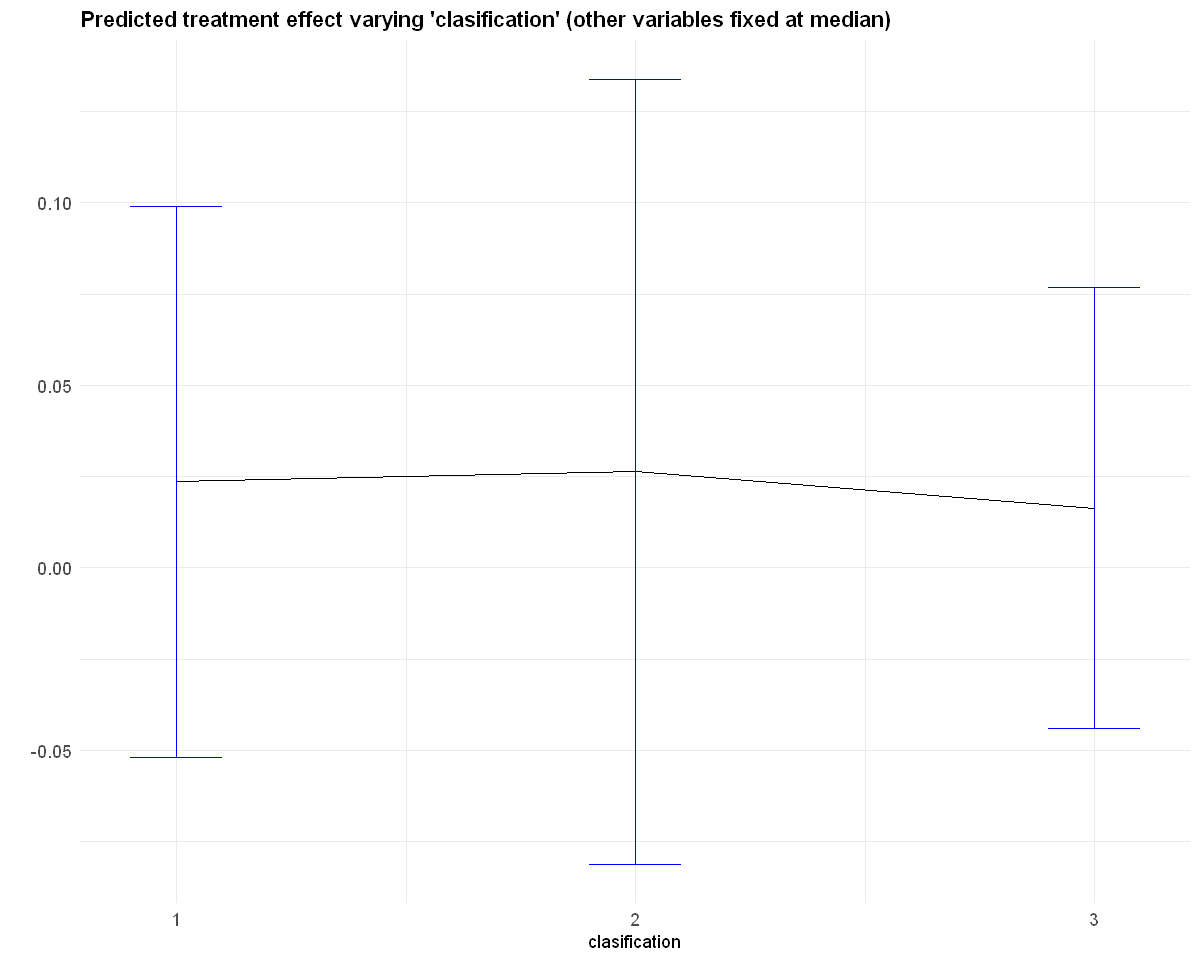

In [64]:
covariates = c("sex", "age", "cpelec", "cpwater",  "nlat_ie", "nlong_ie", "clasification", "level")
data[,"clasification"] <- as.integer(as.character(data[,"clasification"]))
data[,"level"] <- as.integer(as.character(data[,"level"]))
selected.covariate <- "clasification"
# other.covariates <- covariates
other.covariates <- covariates[which(covariates != selected.covariate)]

# Fitting a forest 
# (commented for convenience; no need re-fit if already fitted above)
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + x_dim + y_dim)
# Note: For smaller confidence intervals, set num.trees ~ sample size
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
forest.tau <- causal_forest(X, Y, W, W.hat=.5)  # few trees for speed here

# Compute a grid of values appropriate for the selected covariate
grid.size <- 3 
covariate.grid <- seq(min(data[,selected.covariate]), max(data[,selected.covariate]), length.out=grid.size)

# Other options for constructing a grid:
# For a binary variable, simply use 0 and 1
# grid.size <- 3
# covariate.grid <- c(0,2)  

# For a continuous variable, select appropriate percentiles
# percentiles <- c(1,2,3)
# grid.size <- length(percentiles)
# covariate.grid <- quantile(data[,selected.covariate], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct a dataset
data.grid <- data.frame(sapply(medians, function(x) rep(x, grid.size)), covariate.grid)
colnames(data.grid) <- c(other.covariates, selected.covariate)


# Expand the data
X.grid <- model.matrix(fmla, data.grid)

# Point predictions of the CATE and standard errors 
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)

tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)
                               
# Plot predictions for each group and 95% confidence intervals around them.
options(repr.plot.width=10, repr.plot.height=8)
data.pred <- transform(data.grid, tau.hat=tau.hat, ci.low = tau.hat - 2*tau.hat.se, ci.high = tau.hat + 2*tau.hat.se)
ggplot(data.pred) +
  geom_line(aes_string(x=selected.covariate, y="tau.hat", group = 1), color="black") +
  geom_errorbar(aes_string(x=selected.covariate, ymin="ci.low", ymax="ci.high", width=.2), color="blue") +
   ylab("") +
  ggtitle(paste0("Predicted treatment effect varying '", selected.covariate, "' (other variables fixed at median)")) +
  scale_x_continuous("clasification", breaks=covariate.grid, labels=signif(covariate.grid, 2)) +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
       axis.text=element_text(size=11)) 

In [65]:
with(data, mean(clasification == 3))

[1] 0.4982098

In [66]:
mean(with(data, (clasification == 3) & (abs(age - median(age)) <= 30))) # at most 3 yrs away

[1] 0.4980747

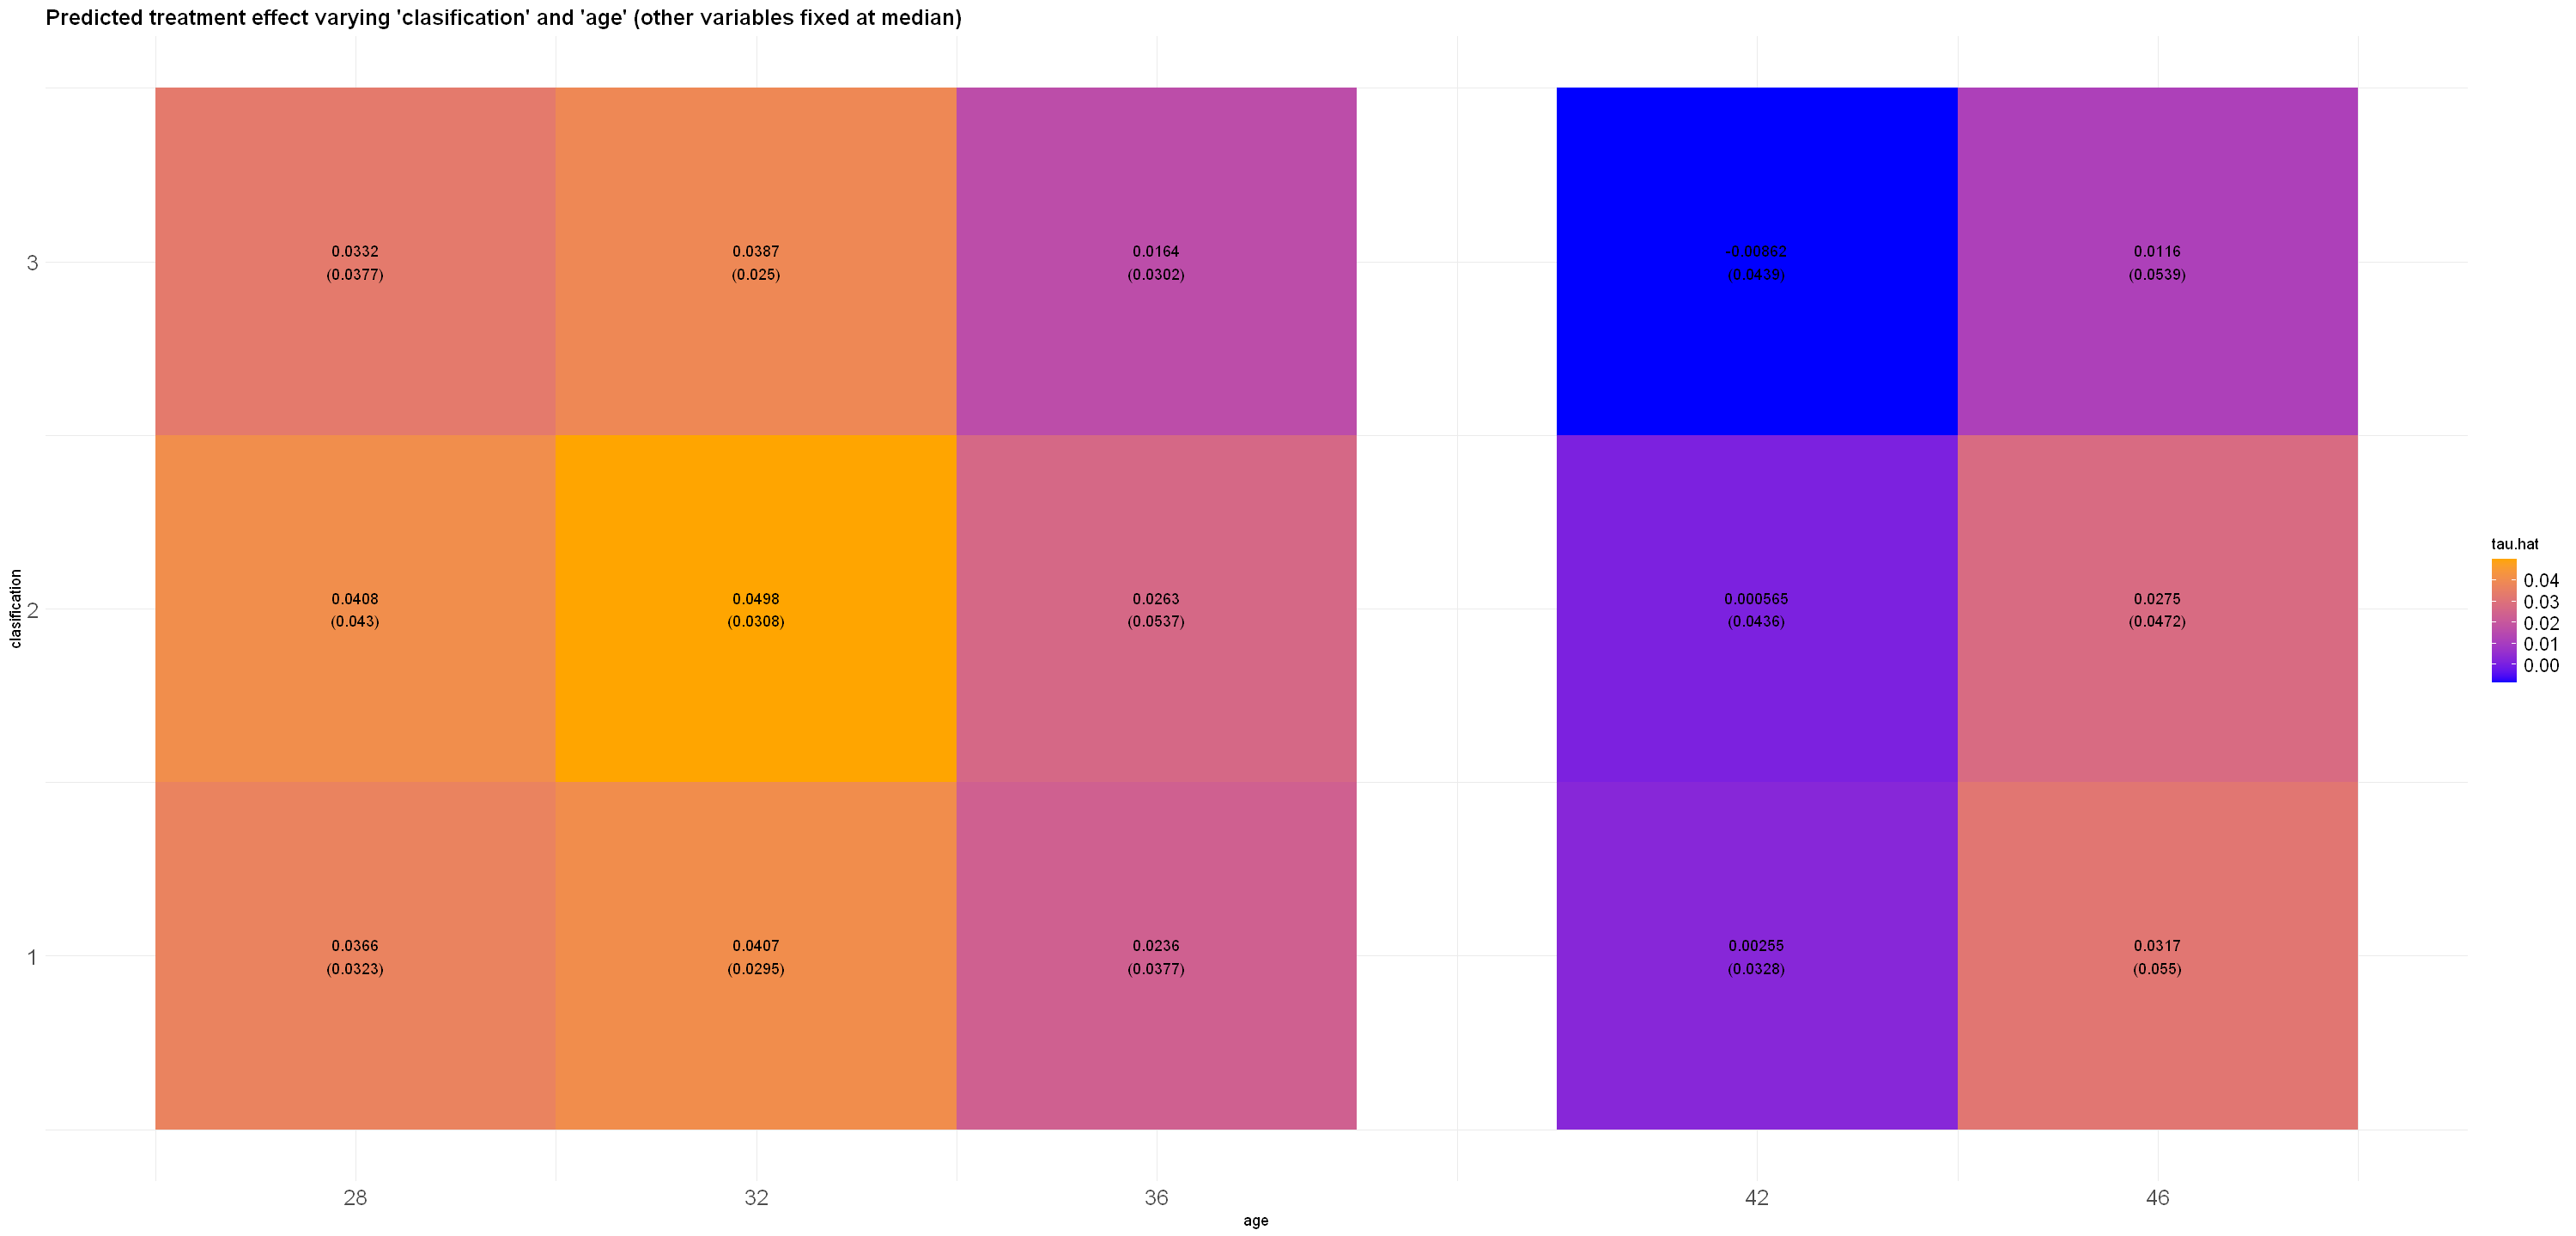

In [67]:
covariates = c("sex", "age", "cpelec", "cpwater",  "nlat_ie", "nlong_ie", "clasification", "level")

x1 <- 'clasification'
x2 <- 'age'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.
x1.grid.size <- 3

# For a continuous variable, select appropriate percentiles
percentiles <- c(.1, .25, .5, .75, .9)
grid.size <- length(percentiles)

x1.grid <- seq(min(data[,x1]), max(data[,x1]), length.out=x1.grid.size)
x2.grid <- quantile(data[,x2], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=25, repr.plot.height=12)
ggplot(df) +
    aes(age, clasification) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("clasification", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("age", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 15, face = "bold"),
          axis.text=element_text(size=15), 
          legend.text = element_text(size=13)) 

## 2. Using BLOCKS

In [68]:
covariates = c("sex", "age", "cpelec", "cpwater", "x_dim", "y_dim", "clasification", "level")

fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)

In [69]:
# Preparing data to fit a causal forest
# fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

In [70]:
forest.tau <- causal_forest(XX, Y, W)

In [71]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

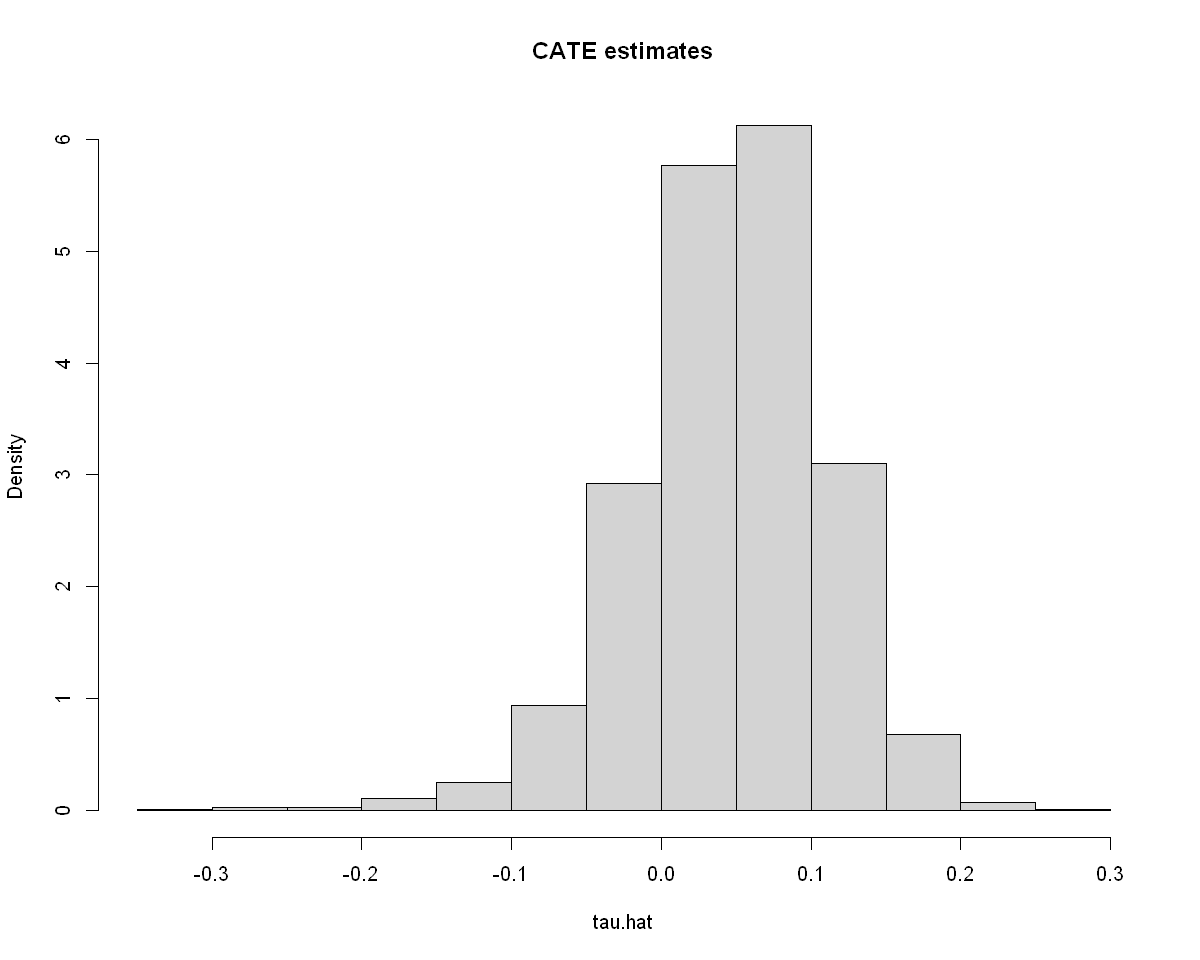

In [72]:
options(repr.plot.width=10, repr.plot.height=8)
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

In [73]:
# measure of variable importance that indicates how often a variable was used in a tree split. 
var_imp <- c(variable_importance(forest.tau))
names(var_imp) <- covariates
sorted_var_imp <- sort(var_imp, decreasing = TRUE)
sorted_var_imp[1:5]  # showing only first few

<NA>       <NA>    cpwater       <NA>     cpelec 
0.35655935 0.33333723 0.12509654 0.07465248 0.03431449

### Data-driven subgroups

In [74]:
# Valid randomized data and observational data with unconfoundedness+overlap.
# Note: read the comments below carefully. 
# In randomized settings, do not estimate forest.e and e.hat; use known assignment probs.

covariates = c( "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim", "clasification", "level")

# Prepare dataset
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
n <- nrow(data)

# Number of rankings that the predictions will be ranking on 
# (e.g., 2 for above/below median estimated CATE, 5 for estimated CATE quintiles, etc.)
num.rankings <- 5  

# Prepare for data.splitting
# Assign a fold number to each observation.
# The argument 'clusters' in the next step will mimick K-fold cross-fitting.
num.folds <- 10
folds <- sort(seq(n) %% num.folds) + 1

# Comment or uncomment depending on your setting.
# Observational setting with unconfoundedness+overlap (unknown assignment probs):
# forest <- causal_forest(X, Y, W, clusters = folds)
# Randomized settings with fixed and known probabilities (here: 0.5).
forest <- causal_forest(X, Y, W, W.hat=.5, clusters = folds)

# Retrieve out-of-bag predictions.
# Predictions for observation in fold k will be computed using 
# trees that were not trained using observations for that fold.
tau.hat <- predict(forest)$predictions


# Rank observations *within each fold* into quintiles according to their CATE predictions.
ranking <- rep(NA, n)
for (fold in seq(num.folds)) {
  tau.hat.quantiles <- quantile(tau.hat[folds == fold], probs = seq(0, 1, by=1/num.rankings))
  ranking[folds == fold] <- cut(tau.hat[folds == fold], tau.hat.quantiles, include.lowest=TRUE,labels=seq(num.rankings))
}

In [75]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
fmla <- paste0(outcome, " ~ 0 + ranking + ranking:", treatment)
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate <- coeftest(ols.ate, vcov=vcovHC(ols.ate, type='HC2'))
interact <- which(grepl(":", rownames(ols.ate)))
ols.ate <- data.frame("ols", paste0("Q", seq(num.rankings)), ols.ate[interact, 1:2])
rownames(ols.ate) <- NULL # just for display
colnames(ols.ate) <- c("method", "ranking", "estimate", "std.err")
ols.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
ols,Q1,0.004176056,0.01199978
ols,Q2,0.021589770,0.01194865
ols,Q3,0.055660250,0.01191845
ols,Q4,0.067940227,0.01198613
ols,Q5,0.063660779,0.01205350


In [76]:
# Computing AIPW scores.
tau.hat <- predict(forest)$predictions
e.hat <- forest$W.hat # P[W=1|X]
m.hat <- forest$Y.hat # E[Y|X]

# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu.hat.0 <- m.hat - e.hat * tau.hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu.hat.1 <- m.hat + (1 - e.hat) * tau.hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
aipw.scores <- tau.hat + W / e.hat * (Y -  mu.hat.1) - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0)
ols <- lm(aipw.scores ~ 0 + factor(ranking))
forest.ate <- data.frame("aipw", paste0("Q", seq(num.rankings)), coeftest(ols, vcov=vcovHC(ols, "HC2"))[,1:2])
colnames(forest.ate) <- c("method", "ranking", "estimate", "std.err")
rownames(forest.ate) <- NULL # just for display
forest.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
aipw,Q1,0.004294476,0.01154148
aipw,Q2,0.014717283,0.01142892
aipw,Q3,0.041706552,0.01149371
aipw,Q4,0.042307237,0.01147431
aipw,Q5,0.036154307,0.01151898


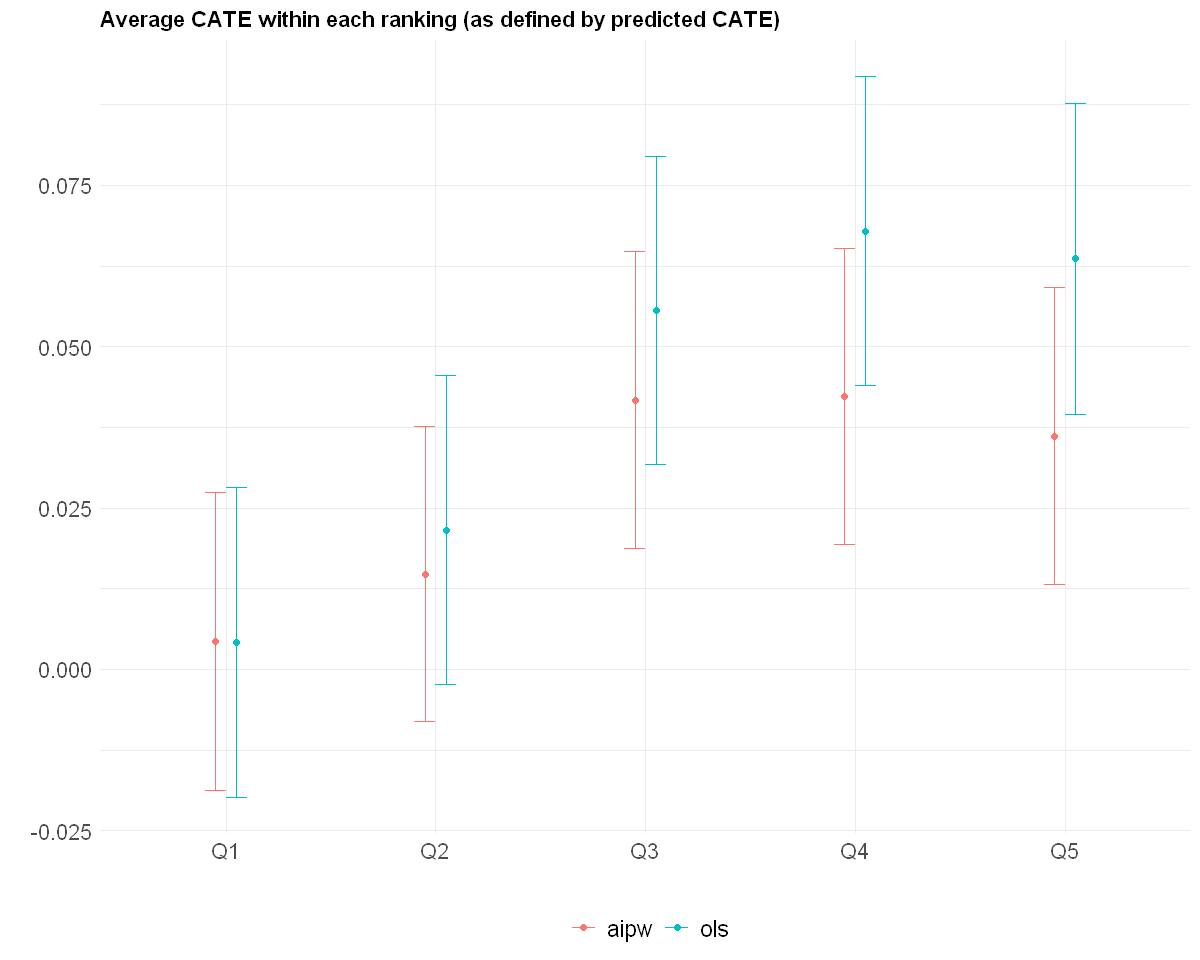

In [77]:
# Concatenate the two results.
res <- rbind(forest.ate, ols.ate)

# Plotting the point estimate of average treatment effect 
# and 95% confidence intervals around it.
options(repr.plot.width=10, repr.plot.height=8)
ggplot(res) +
  aes(x = ranking, y = estimate, group=method, color=method, fig(50,50)) + 
  geom_point(position=position_dodge(0.2)) +
  geom_errorbar(aes(ymin=estimate-2*std.err, ymax=estimate+2*std.err), width=.2, position=position_dodge(0.2)) +
  ylab("") + xlab("") +
  ggtitle("Average CATE within each ranking (as defined by predicted CATE)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
        axis.text=element_text(size=13), 
        legend.position="bottom", legend.title = element_blank(), legend.text = element_text(size=14))

### Test predictions using difference-in-means estimator

In [78]:
# Valid in randomized settings only.

# y ~ ranking + w + ranking:w
fmla <- paste0(outcome, "~ ranking + ", treatment, " + ranking:", treatment) 
ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
interact <- which(sapply(names(coef(ols)), function(x) grepl(":", x)))
res <- summary_rw_lm(ols, indices=interact)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.01741371,0.01702361,0.3063562695,0.3141
Rank 3 - Rank 1,0.05148419,0.01705673,0.0025432203,0.0042
Rank 4 - Rank 1,0.06376417,0.01717603,0.0002056852,0.0008
Rank 5 - Rank 1,0.05948472,0.01715899,0.0005276755,0.0011


In [79]:
# Valid in randomized and observational settings with unconfoundedness+overlap.

# Using AIPW scores computed above
ols <- lm(aipw.scores ~ 1 + factor(ranking))
res <- summary_rw_lm(ols, indices=2:num.rankings)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.01042281,0.01624906,0.52124151,0.5228
Rank 3 - Rank 1,0.03741208,0.01624906,0.02131871,0.0656
Rank 4 - Rank 1,0.03801276,0.01624906,0.01932230,0.0656
Rank 5 - Rank 1,0.03185983,0.01624906,0.04992128,0.0931


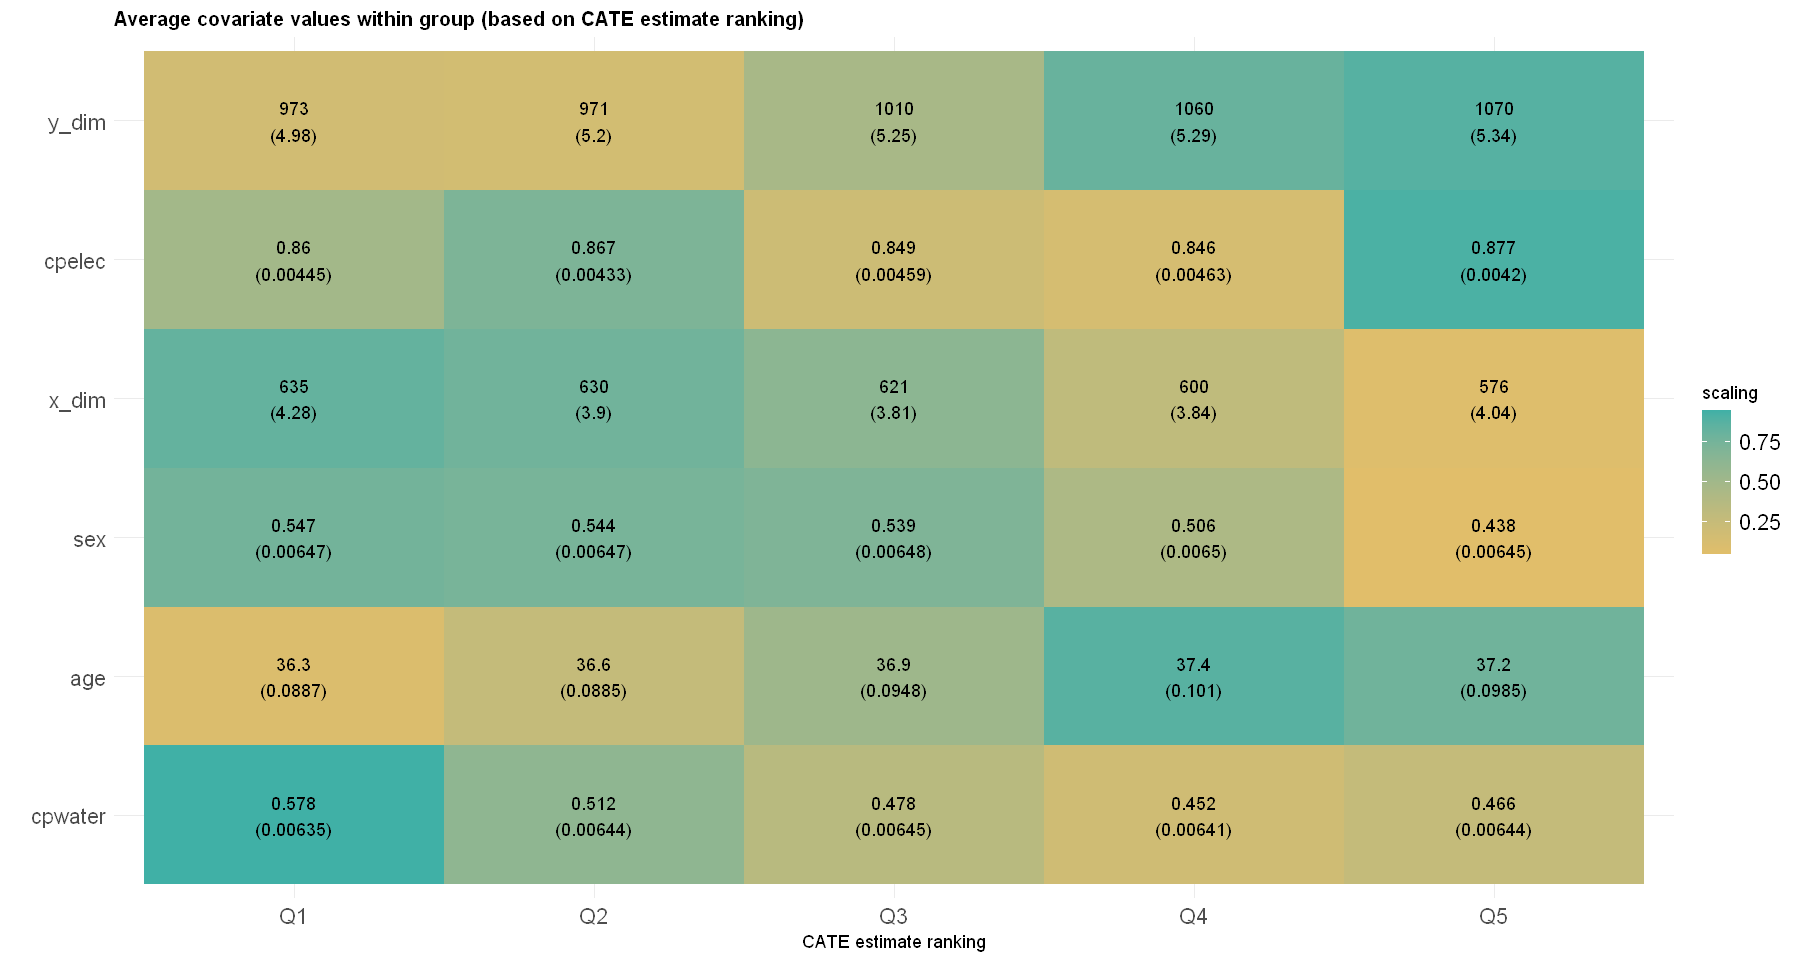

In [80]:
covariates = c( "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim")
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per ranking (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + ranking"))
      ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, ranking=paste0("Q", seq(num.rankings)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)
df <- do.call(rbind, df)


# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

options(repr.plot.width=15, repr.plot.height=8)
# plot heatmap
ggplot(df) +
    aes(ranking, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within group (based on CATE estimate ranking)")) +
    theme_minimal() + 
    ylab("") + xlab("CATE estimate ranking") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

### Best linear projection

In [81]:
# Best linear projection of the conditional average treatment effect on covariates
best_linear_projection(forest.tau, X)

Warning message in best_linear_projection(forest.tau, X):
"Estimated treatment propensities take values between 0.07 and 1 and in particular get very close to 0 or 1."



Best linear projection of the conditional average treatment effect.
Confidence intervals are cluster- and heteroskedasticity-robust (HC3):

                          Estimate  Std. Error t value Pr(>|t|)   
(Intercept)             7.3881e-02  5.9036e-02  1.2515 0.210775   
sex                    -3.2172e-02  1.0720e-02 -3.0011 0.002692 **
age                     6.0897e-04  6.3193e-04  0.9637 0.335224   
factor.level.2         -2.7839e-02  1.4986e-02 -1.8576 0.063234 . 
factor.level.3         -2.2749e-02  1.8792e-02 -1.2106 0.226054   
factor.clasification.2 -7.2015e-03  1.6243e-02 -0.4434 0.657510   
factor.clasification.3 -1.0588e-02  1.7512e-02 -0.6046 0.545429   
cpelec                 -7.2775e-03  1.6699e-02 -0.4358 0.662973   
cpwater                -1.8256e-02  9.9419e-03 -1.8362 0.066335 . 
x_dim                  -2.6085e-06  2.9730e-05 -0.0877 0.930084   
y_dim                   1.0926e-05  2.3668e-05  0.4616 0.644337   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

### Assessing heterogeneity

In [82]:
test_calibration(forest.tau)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction          1.01397    0.16763  6.0487 7.390e-10 ***
differential.forest.prediction  0.71525    0.12698  5.6329 8.939e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Partial dependence

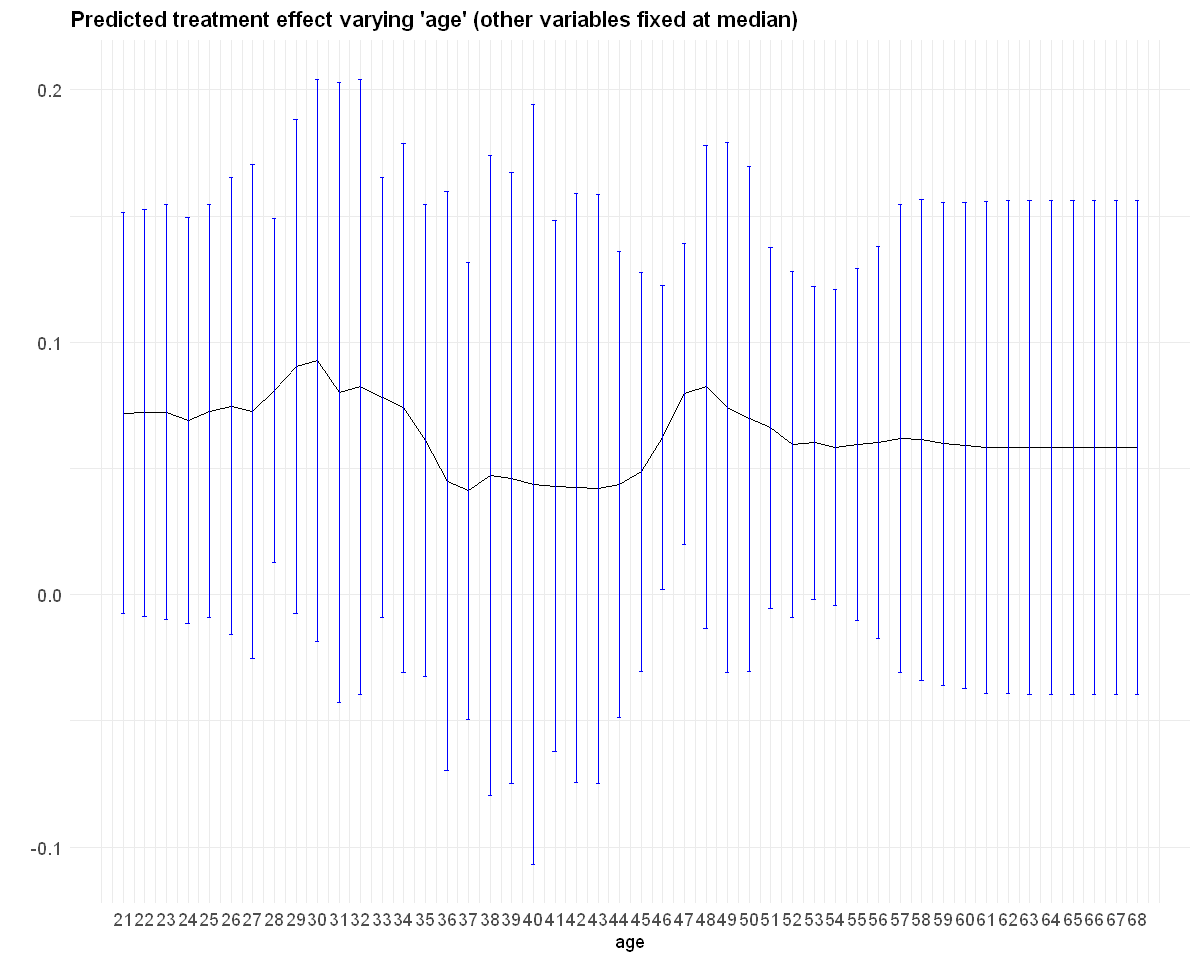

In [180]:
covariates = c("sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim", "clasification", "level")
selected.covariate <- "age"
# other.covariates <- covariates
other.covariates <- covariates[which(covariates != selected.covariate)]

# Fitting a forest 
# (commented for convenience; no need re-fit if already fitted above)
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + x_dim + y_dim)
# Note: For smaller confidence intervals, set num.trees ~ sample size
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
forest.tau <- causal_forest(X, Y, W)  # few trees for speed here

# Compute a grid of values appropriate for the selected covariate
grid.size <- 48
covariate.grid <- seq(min(data[,selected.covariate]), max(data[,selected.covariate]), length.out=grid.size)

# Other options for constructing a grid:
# For a binary variable, simply use 0 and 1
# grid.size <- 3
# covariate.grid <- c(0,2)  

# For a continuous variable, select appropriate percentiles
# percentiles <- c(1,2,3)
# grid.size <- length(percentiles)
# covariate.grid <- quantile(data[,selected.covariate], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct a dataset
data.grid <- data.frame(sapply(medians, function(x) rep(x, grid.size)), covariate.grid)
colnames(data.grid) <- c(other.covariates, selected.covariate)


# Expand the data
X.grid <- model.matrix(fmla, data.grid)

# Point predictions of the CATE and standard errors 
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)

tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)
                               
# Plot predictions for each group and 95% confidence intervals around them.
options(repr.plot.width=10, repr.plot.height=8)
data.pred <- transform(data.grid, tau.hat=tau.hat, ci.low = tau.hat - 2*tau.hat.se, ci.high = tau.hat + 2*tau.hat.se)
ggplot(data.pred) +
  geom_line(aes_string(x=selected.covariate, y="tau.hat", group = 1), color="black") +
  geom_errorbar(aes_string(x=selected.covariate, ymin="ci.low", ymax="ci.high", width=.2), color="blue") +
   ylab("") +
  ggtitle(paste0("Predicted treatment effect varying '", selected.covariate, "' (other variables fixed at median)")) +
  scale_x_continuous("age", breaks=covariate.grid, labels=signif(covariate.grid, 2)) +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
       axis.text=element_text(size=11)) 

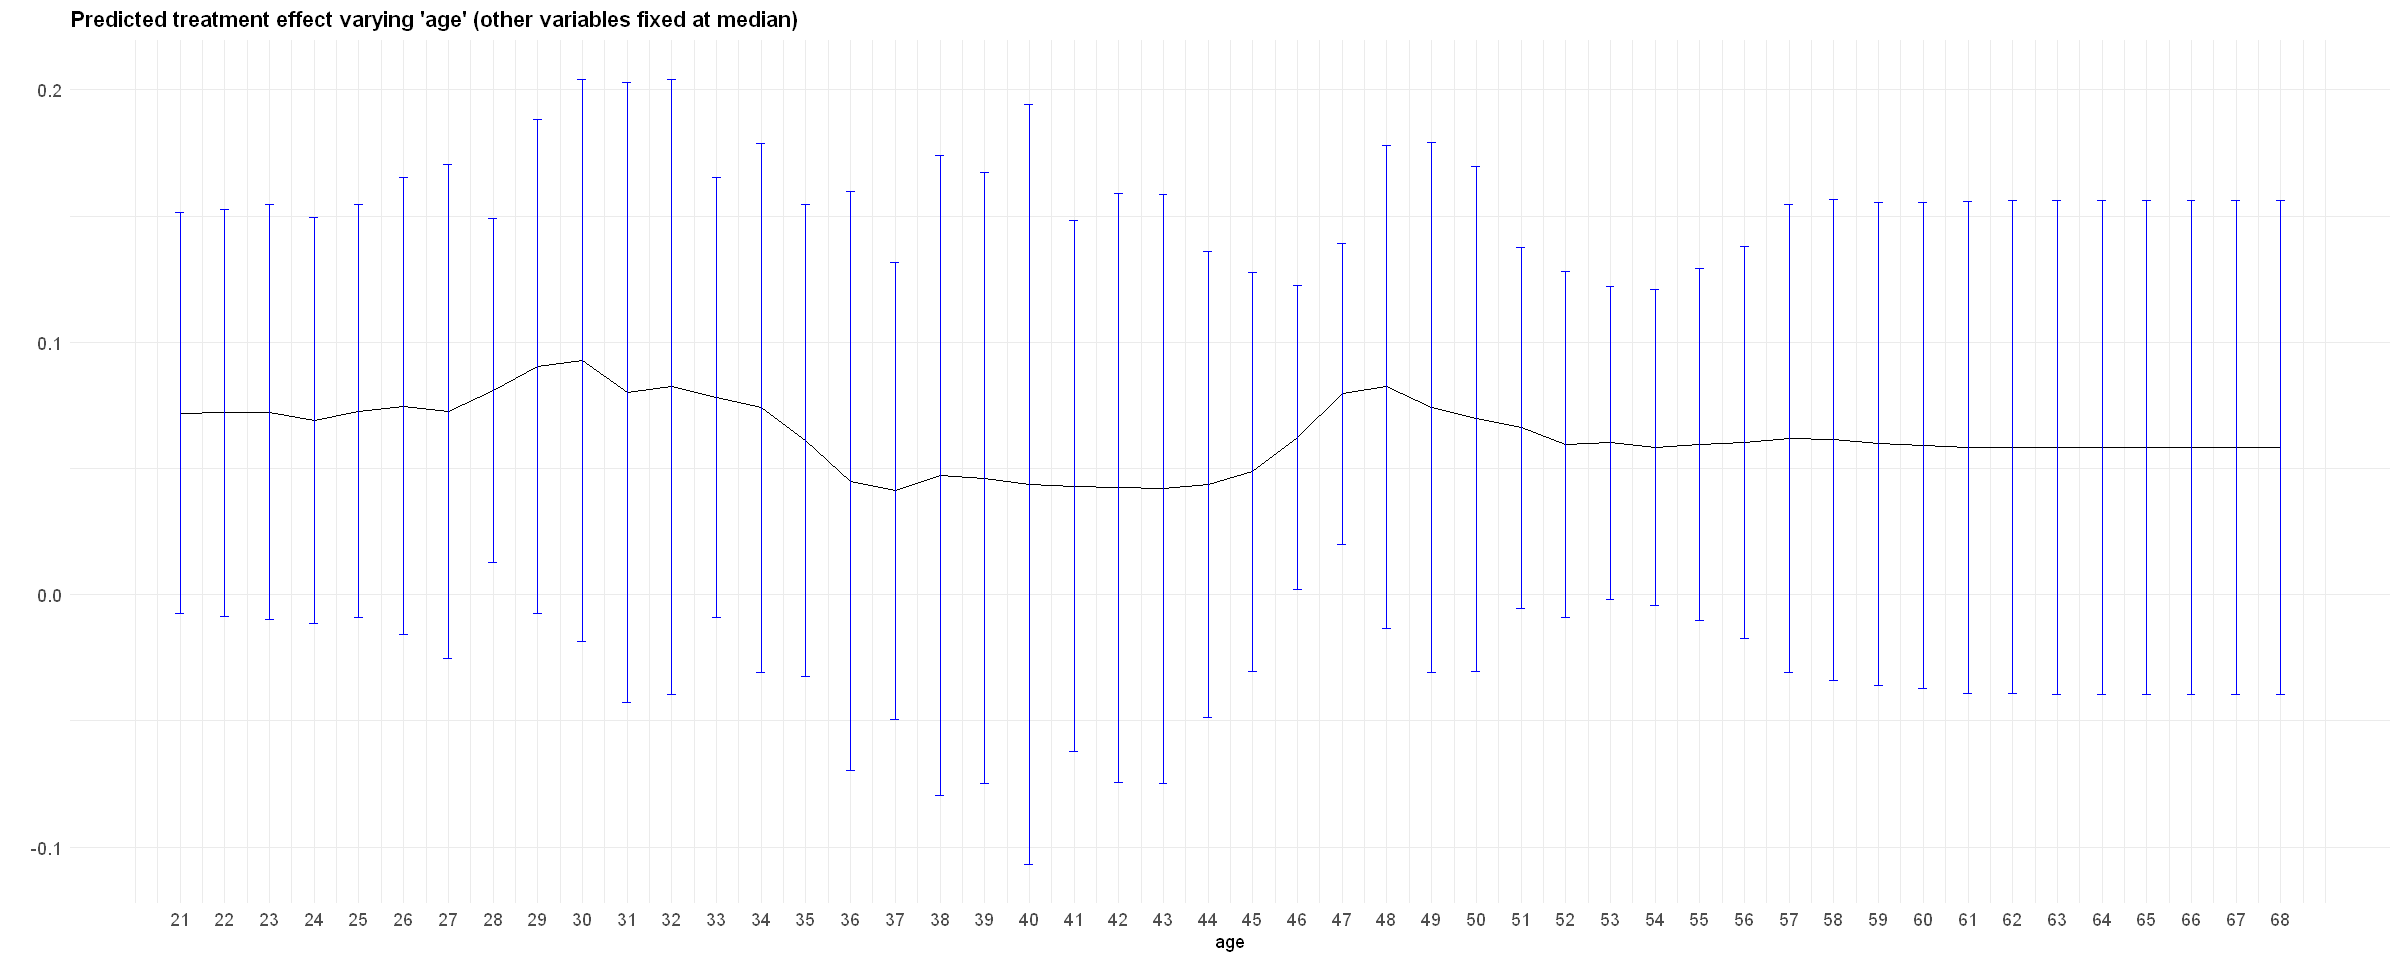

In [181]:
                               
# Plot predictions for each group and 95% confidence intervals around them.
options(repr.plot.width=20, repr.plot.height=8)
data.pred <- transform(data.grid, tau.hat=tau.hat, ci.low = tau.hat - 2*tau.hat.se, ci.high = tau.hat + 2*tau.hat.se)
ggplot(data.pred) +
  geom_line(aes_string(x=selected.covariate, y="tau.hat", group = 1), color="black") +
  geom_errorbar(aes_string(x=selected.covariate, ymin="ci.low", ymax="ci.high", width=.2), color="blue") +
   ylab("") +
  ggtitle(paste0("Predicted treatment effect varying '", selected.covariate, "' (other variables fixed at median)")) +
  scale_x_continuous("age", breaks=covariate.grid, labels=signif(covariate.grid, 2)) +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
       axis.text=element_text(size=11)) 

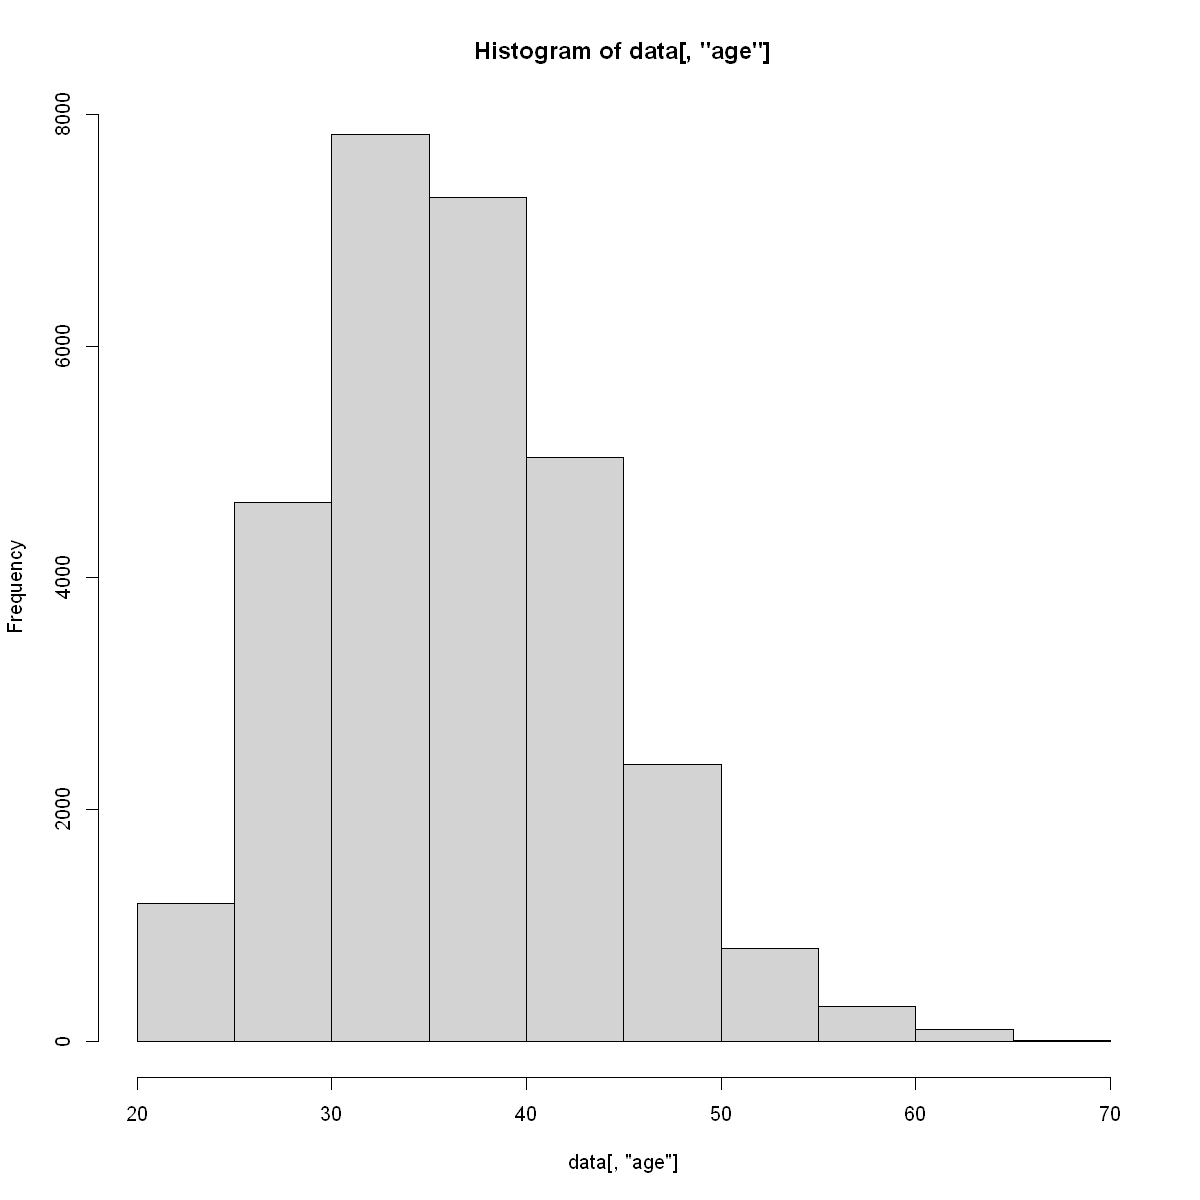

In [154]:
hist(data[,"age"])

In [84]:
with(data, mean(clasification == 3))

[1] 0.4982098

In [85]:
mean(with(data, (clasification == 3) & (abs(age - median(age)) <= 30))) # at most 3 yrs away

[1] 0.4980747

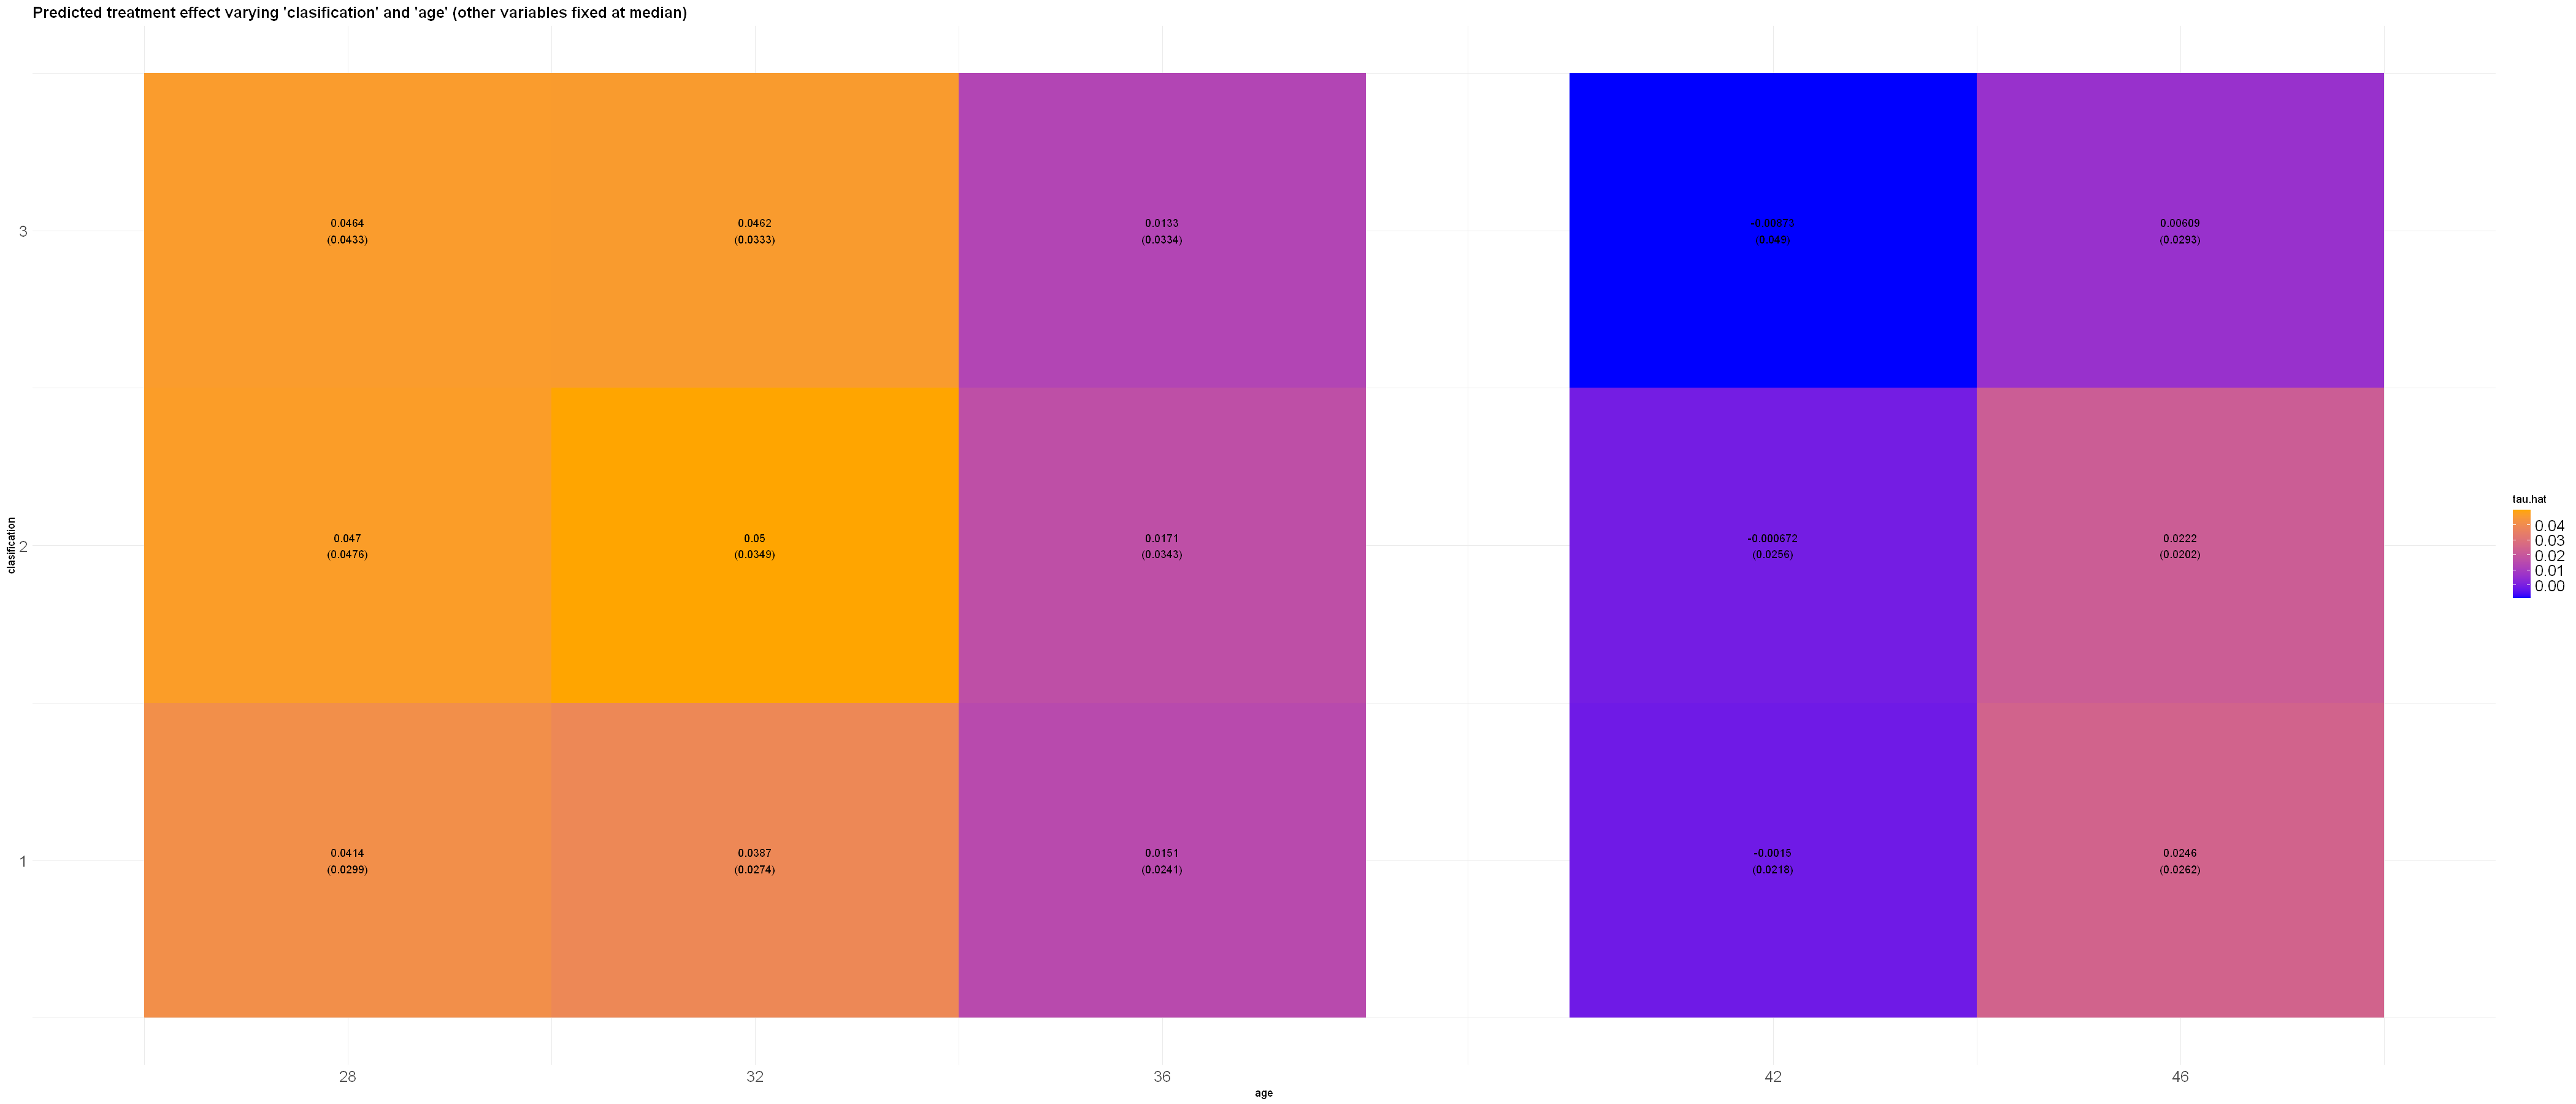

In [88]:
covariates = c("sex", "age", "cpelec", "cpwater",  "nlat_ie", "nlong_ie", "clasification", "level")

x1 <- 'clasification'
x2 <- 'age'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]


# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.
x1.grid.size <- 3

# For a continuous variable, select appropriate percentiles
percentiles <- c(.1, .25, .5, .75, .9)
grid.size <- length(percentiles)

x1.grid <- seq(min(data[,x1]), max(data[,x1]), length.out=x1.grid.size)
x2.grid <- quantile(data[,x2], probs=percentiles)


# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=35, repr.plot.height=15)
ggplot(df) +
    aes(age, clasification) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("clasification", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("age", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 15, face = "bold"),
          axis.text=element_text(size=15), 
          legend.text = element_text(size=15)) 

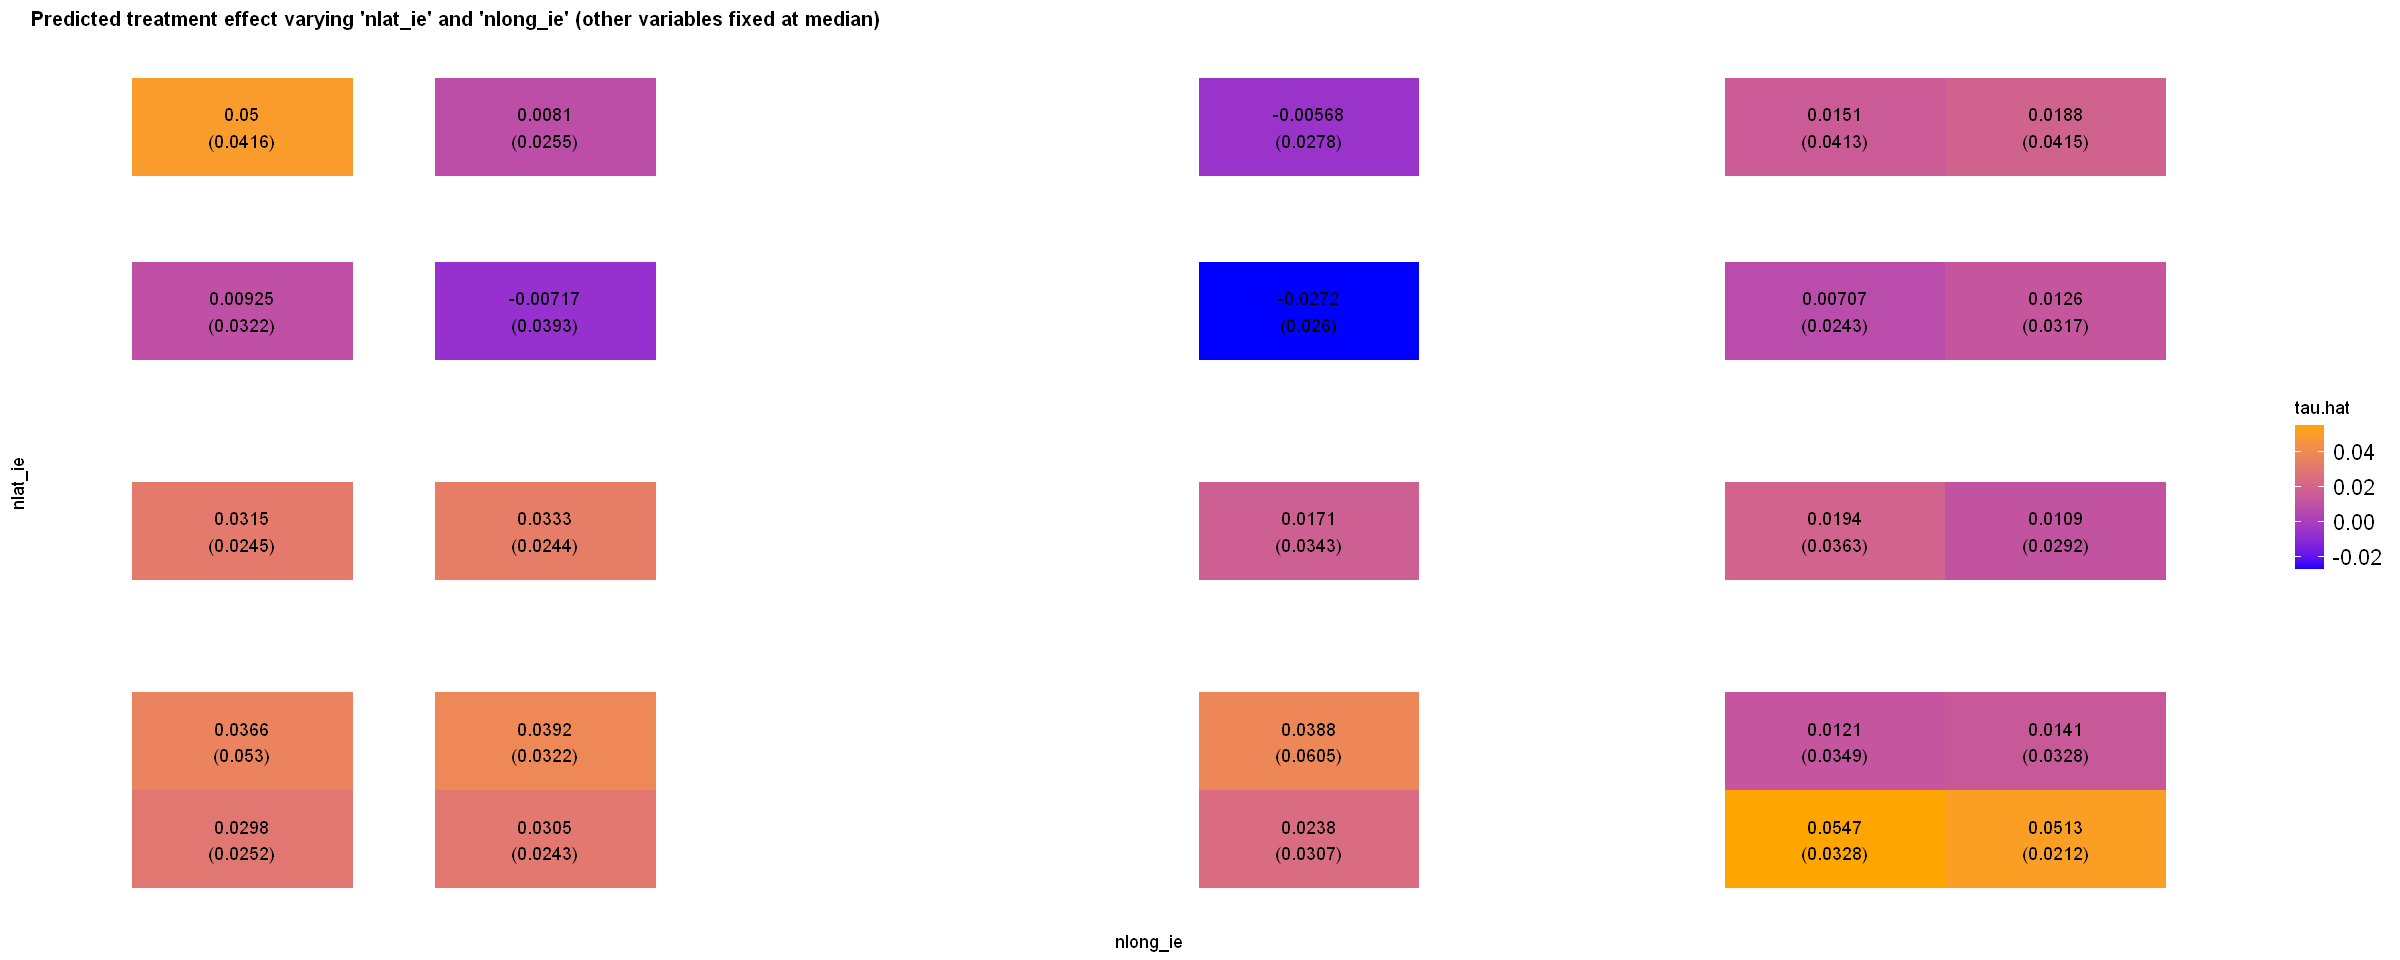

In [89]:
covariates = c( "sex", "age", "cpelec", "cpwater",  "nlat_ie" , "nlong_ie", "clasification", "level")
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))

x1 <- 'nlat_ie'
x2 <- 'nlong_ie'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.

percentiles <- c(0.1, 0.25, 0.5, 0.75, 0.9)
grid.size <- length(percentiles)
x1.grid <- quantile(data[,x1], probs=percentiles)

# x2.grid.size <- length(percentiles)
x2.grid <- quantile(data[,x2], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=20, repr.plot.height=8)
ggplot(df) +
    aes(nlat_ie, nlong_ie) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("nlat_ie", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("nlong_ie", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

In [149]:
df[order(df $ tau.hat),]

,sex,age,cpelec,cpwater,nlat_ie,nlong_ie,clasification,level,tau.hat,labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
18,1,36,1,0.5,-8.623900,-73.91166,2,2,-0.027216666,-0.0272 (0.026)
17,1,36,1,0.5,-12.550440,-73.91166,2,2,-0.007170805,-0.00717 (0.0393)
23,1,36,1,0.5,-8.623900,-72.07256,2,2,-0.005675741,-0.00568 (0.0278)
19,1,36,1,0.5,-5.915680,-73.91166,2,2,0.007068954,0.00707 (0.0243)
22,1,36,1,0.5,-12.550440,-72.07256,2,2,0.008101890,0.0081 (0.0255)
16,1,36,1,0.5,-14.108400,-73.91166,2,2,0.009247268,0.00925 (0.0322)
15,1,36,1,0.5,-4.782045,-76.10851,2,2,0.010878495,0.0109 (0.0292)
9,1,36,1,0.5,-5.915680,-78.20873,2,2,0.012069270,0.0121 (0.0349)
20,1,36,1,0.5,-4.782045,-73.91166,2,2,0.012614749,0.0126 (0.0317)


In [131]:
df

,sex,age,cpelec,cpwater,nlat_ie,nlong_ie,clasification,level,tau.hat,labels
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,36,1,0.5,-14.108400,-79.18822,2,2,0.029810299,0.0298 (0.0252)
2,1,36,1,0.5,-12.550440,-79.18822,2,2,0.030480695,0.0305 (0.0243)
3,1,36,1,0.5,-8.623900,-79.18822,2,2,0.023827114,0.0238 (0.0307)
4,1,36,1,0.5,-5.915680,-79.18822,2,2,0.054703452,0.0547 (0.0328)
5,1,36,1,0.5,-4.782045,-79.18822,2,2,0.051261691,0.0513 (0.0212)
6,1,36,1,0.5,-14.108400,-78.20873,2,2,0.036564507,0.0366 (0.053)
7,1,36,1,0.5,-12.550440,-78.20873,2,2,0.039152475,0.0392 (0.0322)
8,1,36,1,0.5,-8.623900,-78.20873,2,2,0.038774210,0.0388 (0.0605)
9,1,36,1,0.5,-5.915680,-78.20873,2,2,0.012069270,0.0121 (0.0349)


In [95]:
attach(data)

The following objects are masked from data (pos = 3):

    age, ano, clasification, cpelec, cpwater, level, nlat_ie, nlong_ie,
    sex, stay, tenured, treat12, x_dim, y_dim


The following objects are masked from data (pos = 4):

    age, ano, clasification, cpelec, cpwater, level, nlat_ie, nlong_ie,
    sex, stay, tenured, treat12, x_dim, y_dim




In [102]:
x2.grid; x1.grid

10%       25%       50%       75%       90% 
-79.18822 -78.20873 -76.10851 -73.91166 -72.07256

10%        25%        50%        75%        90% 
-14.108400 -12.550440  -8.623900  -5.915680  -4.782045

In [113]:
quantile(data[,"nlong_ie"],0.99)

99% 
-69.34426

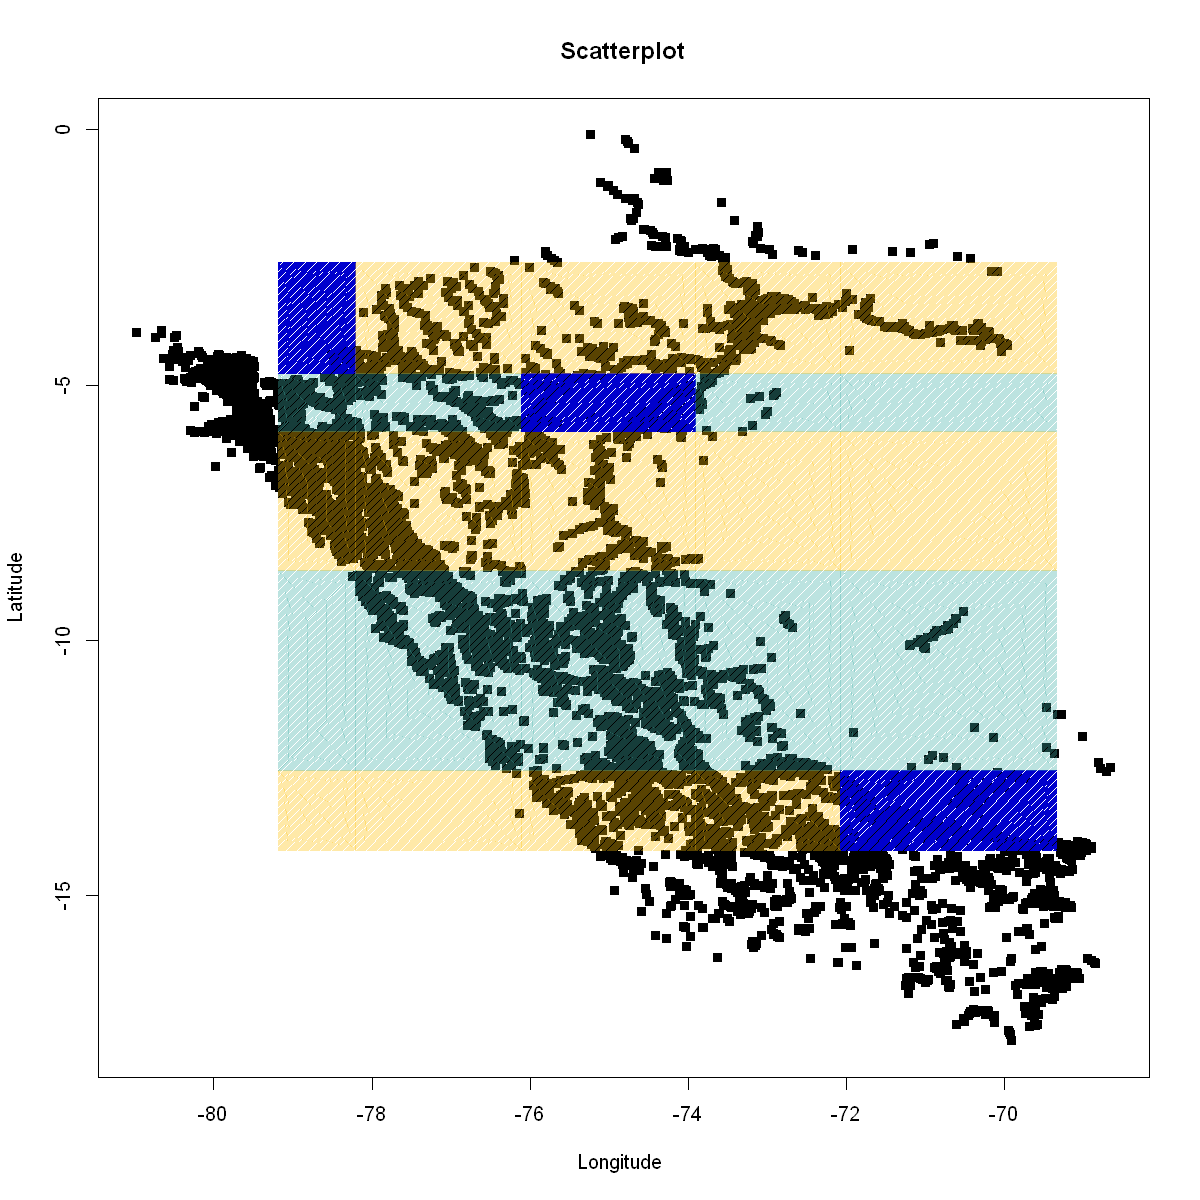

In [152]:
options(repr.plot.width=10, repr.plot.height=10)
col2 <- rgb(0.250980, 0.690196, 0.650980, .35)
col1 <- rgb(0.9960938, 0.7539062, 0.0273438, .35)
col3 <- rgb(0, 0, 205, maxColorValue = 255)

plot(nlong_ie, nlat_ie, main="Scatterplot",
   xlab="Longitude ", ylab="Latitude", pch=15)

rect(-79.18822, -14.1084, -78.2087275,-12.55044, density = 250, angle = 45, col = col1, border = NA)
rect(-79.18822, -12.55044,-78.2087275,-8.6239 , density = 250, angle = 45, col = col2, border = NA)
rect(-79.18822, -8.623900, -78.2087275,-5.915680, density = 250, angle = 45, col = col1, border = NA)
rect(-79.18822, -5.915680,-78.2087275, -4.782045, density = 250, angle = 45, col = col2, border = NA)
rect(-79.18822, -4.782045, -78.2087275,-2.59553, density = 250, angle = 45, col = col3, border = NA)

rect(-78.20873, -14.1084, -76.10851, -12.55044, density = 250, angle = 45, col = col1, border = NA)
rect(-78.20873, -12.55044,-76.10851, -8.6239 , density = 250, angle = 45, col = col2, border = NA)
rect(-78.20873, -8.623900,-76.10851, -5.915680, density = 250, angle = 45, col = col1, border = NA)
rect(-78.20873, -5.915680,-76.10851, -4.782045, density = 250, angle = 45, col = col2, border = NA)
rect(-78.20873, -4.782045,-76.10851, -2.59553, density = 250, angle = 45, col = col1, border = NA)

rect(-76.10851, -14.1084, -73.91166,-12.55044, density = 250, angle = 45, col = col1, border = NA)
rect(-76.10851, -12.55044,-73.91166,-8.6239 , density = 250, angle = 45, col = col2, border = NA)
rect(-76.10851, -8.623900,-73.91166,-5.915680, density = 250, angle = 45, col = col1, border = NA)
rect(-76.10851, -5.915680,-73.91166, -4.782045, density = 250, angle = 45, col = col3, border = NA)
rect(-76.10851, -4.782045,-73.91166,-2.59553, density = 250, angle = 45, col = col1, border = NA)

rect(-73.91166, -14.1084, -72.07256,-12.55044, density = 250, angle = 45, col = col1, border = NA)
rect(-73.91166, -12.55044,-72.07256,-8.6239 , density = 250, angle = 45, col = col2, border = NA)
rect(-73.91166, -8.623900,-72.07256,-5.915680, density = 250, angle = 45, col = col1, border = NA)
rect(-73.91166, -5.915680,-72.07256, -4.782045, density = 250, angle = 45, col = col2, border = NA)
rect(-73.91166, -4.782045,-72.07256,-2.59553, density = 250, angle = 45, col = col1, border = NA)

rect(-72.07256, -14.1084, -69.3442615,-12.55044, density = 250, angle = 45, col = col3, border = NA)
rect(-72.07256, -12.55044,-69.3442615,-8.6239 , density = 250, angle = 45, col = col2, border = NA)
rect(-72.07256, -8.623900,-69.3442615,-5.915680, density = 250, angle = 45, col = col1, border = NA)
rect(-72.07256, -5.915680,-69.3442615, -4.782045, density = 250, angle = 45, col = col2, border = NA)
rect(-72.07256, -4.782045,-69.3442615,-2.59553, density = 250, angle = 45, col = col1, border = NA)

In [ ]:
col2 <- rgb(0.250980, 0.690196, 0.650980, .35)
col1 <- rgb(0.9960938, 0.7539062, 0.0273438, .35)
plot(X[,1], X[,2], pch=ifelse(W, 21, 23), cex=1.5, bg=gray(y.norm), xlab="X1", ylab="X2")
rect(-.1, -.1, .5, 1.1, density = 250, angle = 45, col = col1, border = NA)
rect(.5, -.1, 1.1, .5, density = 250, angle = 45, col = col1, border = NA)
rect(.5, .5, 1.1, 1.1, density = 250, angle = 45, col = col2, border = NA)